<a href="https://colab.research.google.com/github/dtabuena/CrispyMice/blob/main/_Run_All_Nell2_CA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',
            'fun_math.ipynb',
            'Pipeline_Wrapper.ipynb'
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f


try: shutil.rmtree('/content/CrispyMice')
except: None
!git clone https://github.com/dtabuena/CrispyMice
to_import = ['CrispyPipelineFuncs.ipynb']
for i in to_import:
    f = '/content/CrispyMice/' + i
    %run $f


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'EphysLib'...
remote: Enumerating objects: 541, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 541 (delta 168), reused 170 (delta 125), pack-reused 307
Receiving objects: 100% (541/541), 4.57 MiB | 25.88 MiB/s, done.
Resolving deltas: 100% (342/342), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


ERROR:root:File `'/content/EphysLib/Pipeline_Wrapper.ipynbimporting_abfs_from_dropbox.ipynb.py'` not found.


Cloning into 'CrispyMice'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 254 (delta 102), reused 25 (delta 25), pack-reused 107
Receiving objects: 100% (254/254), 22.77 MiB | 10.38 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [2]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree'
           'I0 - 3min GapFree']

Archive:  /content/my_ephys_data_NELL2.zip
mapname:  conversion of  failed
replace /content/my_ephys_data_NELL2/2022_10_24/sample nell2 4x/comments.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename:  extracting: /content/my_ephys_data_NELL2/2022_10_24/sample nell2 4x/comments.txt  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/sample nell2 4x/DisplaySettings.json  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/2022x10x07_FlxE2Ki_F_P480_s003_c007_CA3_0000.sta  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0000.abf  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/2022x10x24_NEL2_E4KI_F_P254_s001_c005_CA3xPOS_0004.abf  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/2022x10x24_NEL2_E4KI_F_P254_s001_c008_CA3xNEG_0005.abf  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/2022x10x24_NEL2_E4KI_F_P254_s001_c004_CA3xNEG_0008.abf  
 extracting: /content/my_ephys_data_NELL2/2022_10_24/2022x10x24_NEL2_E4KI_F_P254_s001_c00

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/211 [00:00<?, ?it/s]

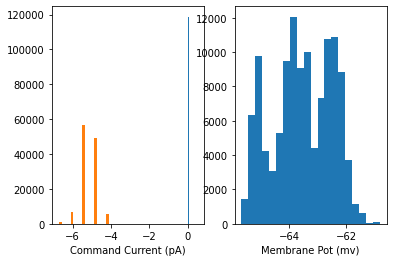

  0%|          | 1/211 [00:00<01:40,  2.10it/s]

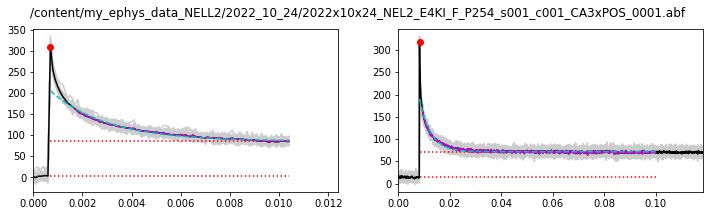

  1%|          | 2/211 [00:01<02:31,  1.38it/s]

<Figure size 432x288 with 0 Axes>

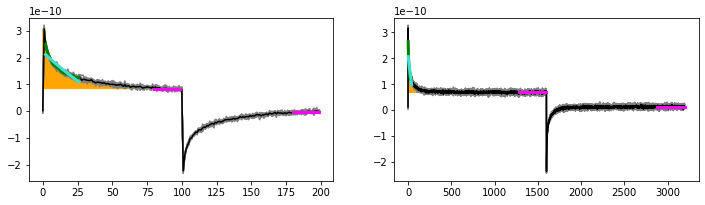

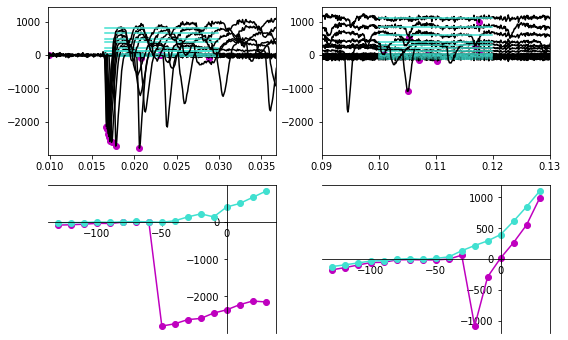

  1%|▏         | 3/211 [00:02<03:47,  1.09s/it]

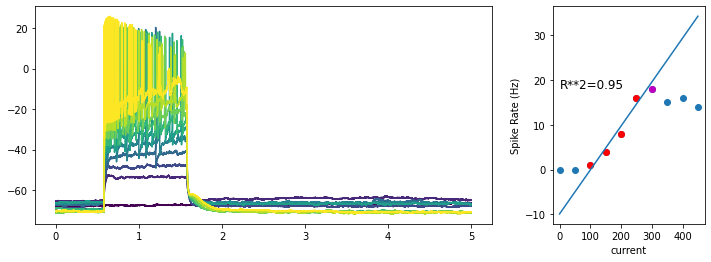

  2%|▏         | 4/211 [00:05<05:51,  1.70s/it]

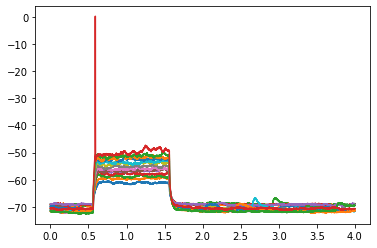

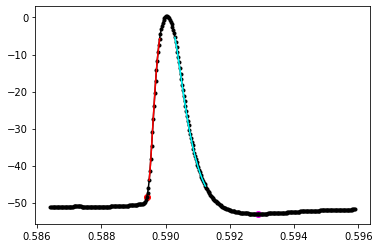

  2%|▏         | 5/211 [00:10<10:17,  3.00s/it]

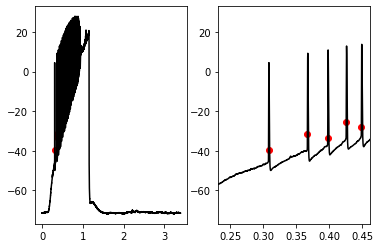

  3%|▎         | 7/211 [00:12<06:28,  1.90s/it]

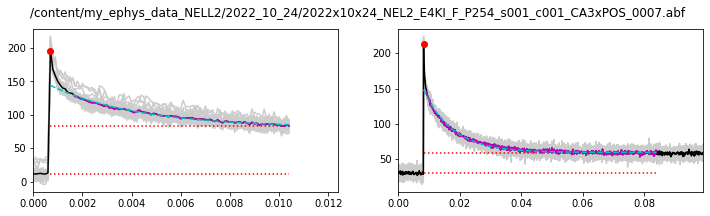

  4%|▍         | 8/211 [00:13<05:21,  1.58s/it]

<Figure size 432x288 with 0 Axes>

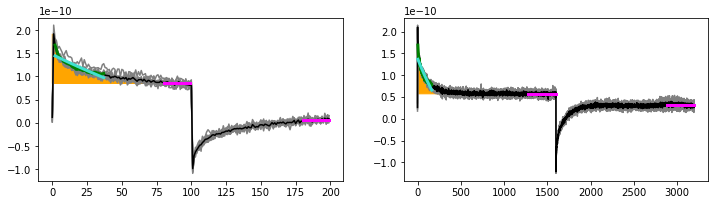

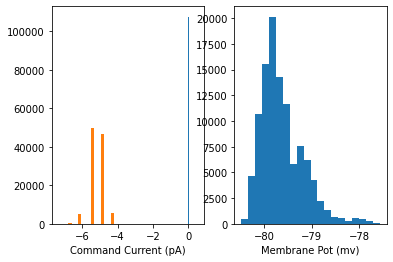

  4%|▍         | 9/211 [00:14<04:34,  1.36s/it]

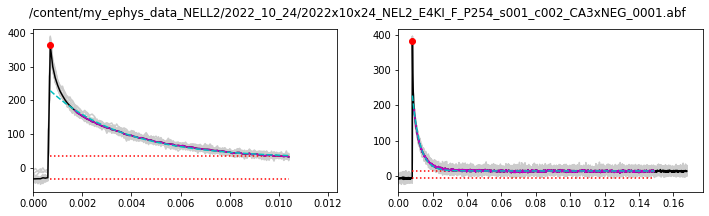

  5%|▍         | 10/211 [00:15<04:01,  1.20s/it]

<Figure size 432x288 with 0 Axes>

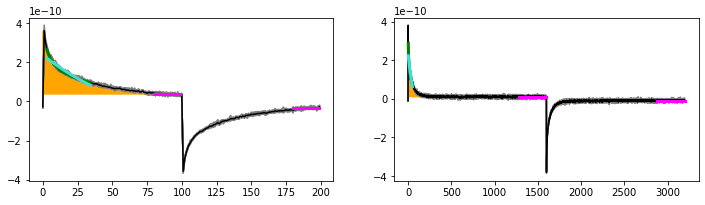

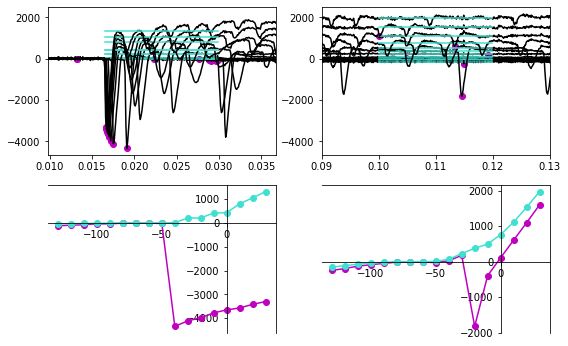

  5%|▌         | 11/211 [00:16<04:11,  1.26s/it]

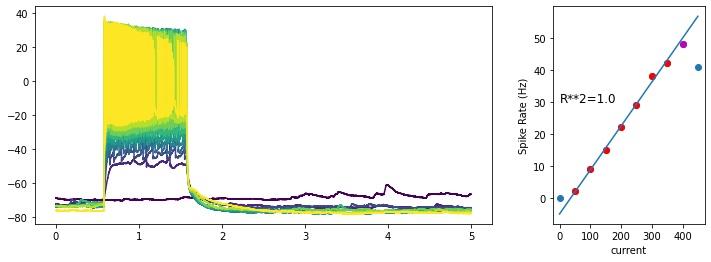

  6%|▌         | 12/211 [00:19<05:28,  1.65s/it]

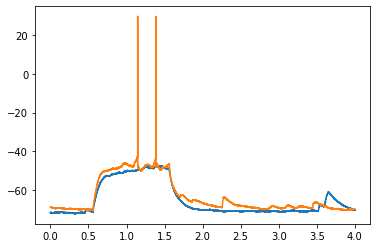

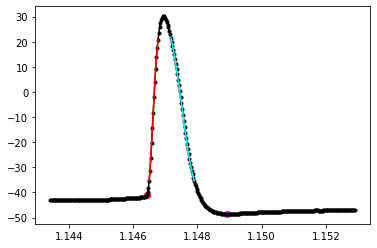

  6%|▌         | 13/211 [00:22<06:56,  2.10s/it]

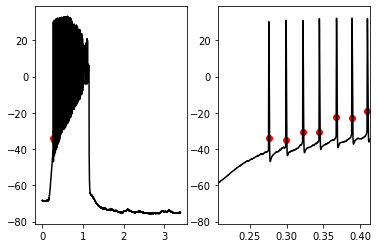

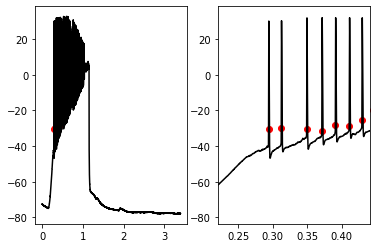

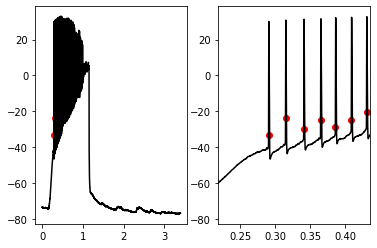

  7%|▋         | 14/211 [00:24<06:23,  1.95s/it]

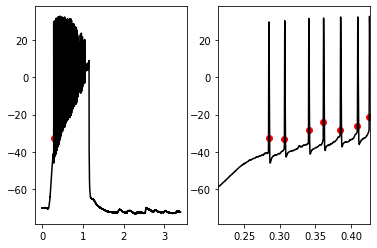

  8%|▊         | 16/211 [00:25<04:46,  1.47s/it]

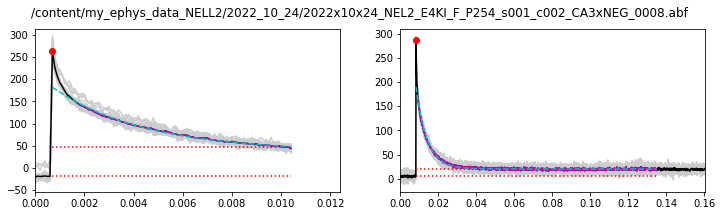

  8%|▊         | 17/211 [00:26<04:11,  1.30s/it]

<Figure size 432x288 with 0 Axes>

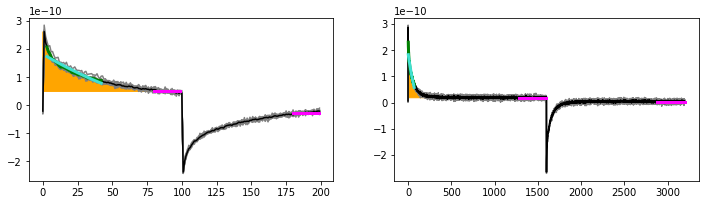

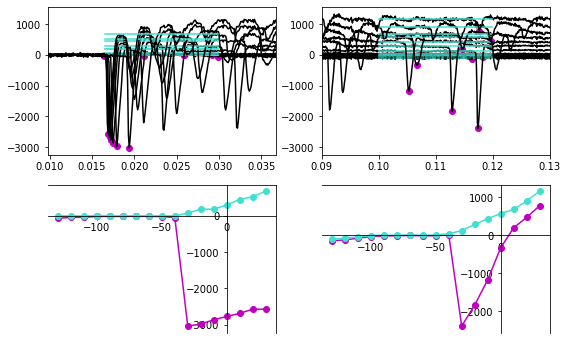

  9%|▊         | 18/211 [00:28<04:21,  1.36s/it]

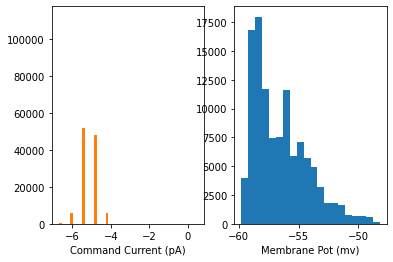

  9%|▉         | 19/211 [00:28<03:29,  1.09s/it]

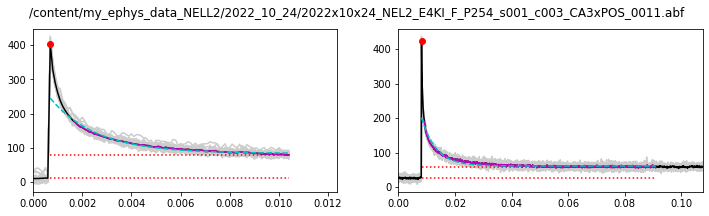

  9%|▉         | 20/211 [00:29<03:13,  1.01s/it]

<Figure size 432x288 with 0 Axes>

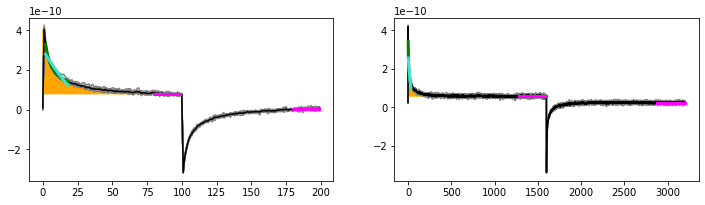

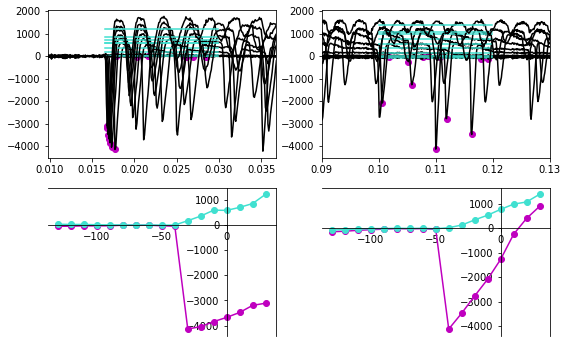

 10%|▉         | 21/211 [00:31<03:36,  1.14s/it]

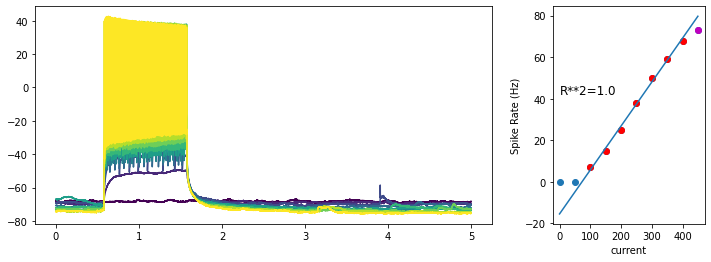

 10%|█         | 22/211 [00:33<05:05,  1.62s/it]

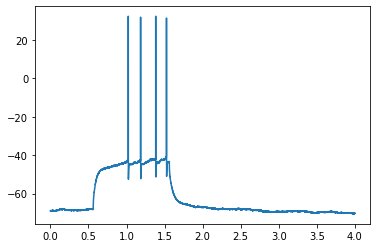

 11%|█         | 23/211 [00:34<03:49,  1.22s/it]

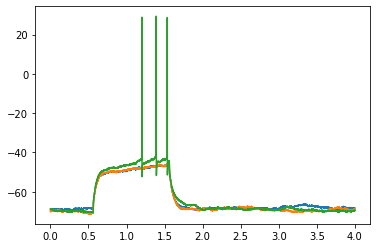

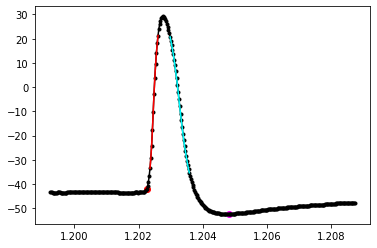

 11%|█▏        | 24/211 [00:37<05:39,  1.82s/it]

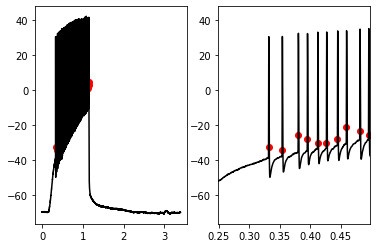

 12%|█▏        | 26/211 [00:39<04:24,  1.43s/it]

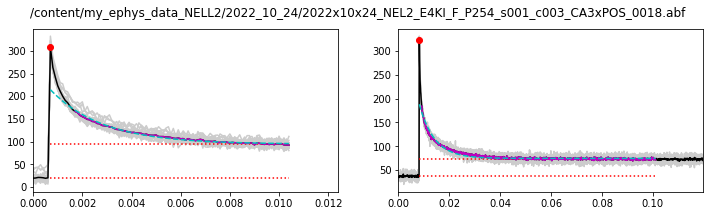

 13%|█▎        | 27/211 [00:40<03:53,  1.27s/it]

<Figure size 432x288 with 0 Axes>

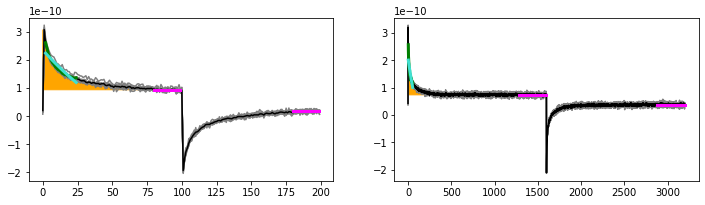

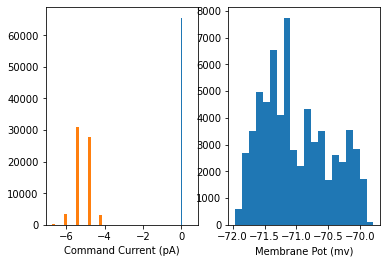

 13%|█▎        | 28/211 [00:41<03:30,  1.15s/it]

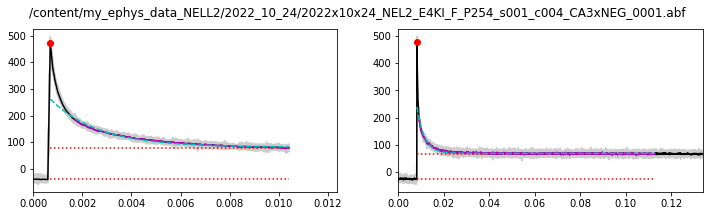

 14%|█▎        | 29/211 [00:41<03:14,  1.07s/it]

<Figure size 432x288 with 0 Axes>

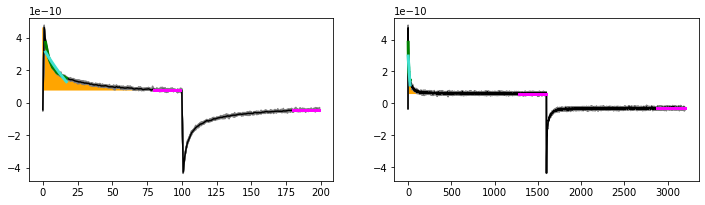

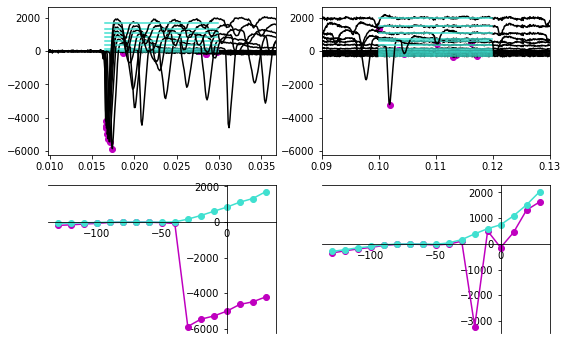

 14%|█▍        | 30/211 [00:43<03:31,  1.17s/it]

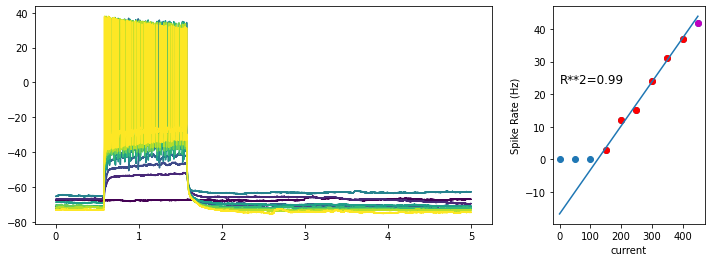

 15%|█▍        | 31/211 [00:45<04:46,  1.59s/it]

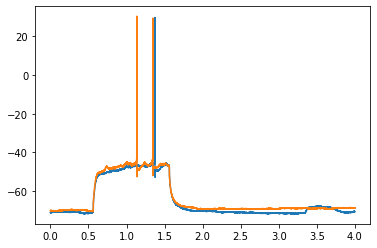

 15%|█▌        | 32/211 [00:46<03:53,  1.30s/it]

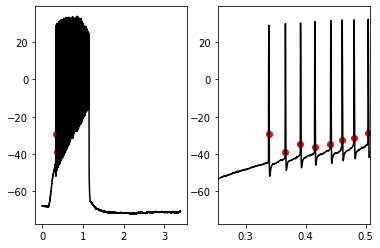

 16%|█▌        | 33/211 [00:47<03:17,  1.11s/it]

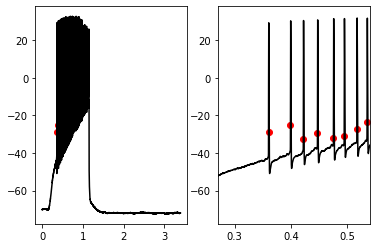

 17%|█▋        | 35/211 [00:49<03:08,  1.07s/it]

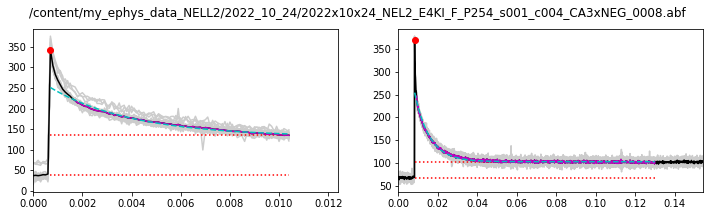

 17%|█▋        | 36/211 [00:49<02:59,  1.02s/it]

<Figure size 432x288 with 0 Axes>

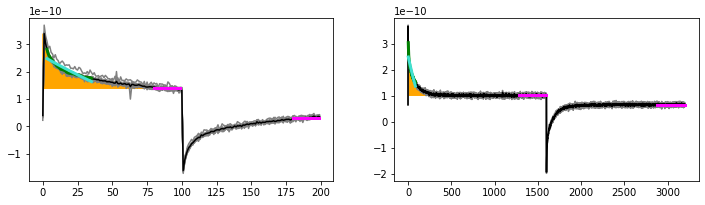

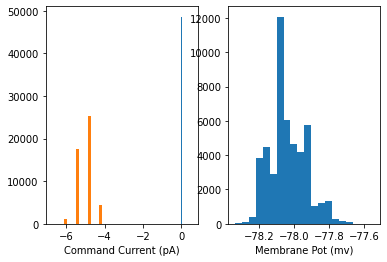

 18%|█▊        | 37/211 [00:50<02:42,  1.07it/s]

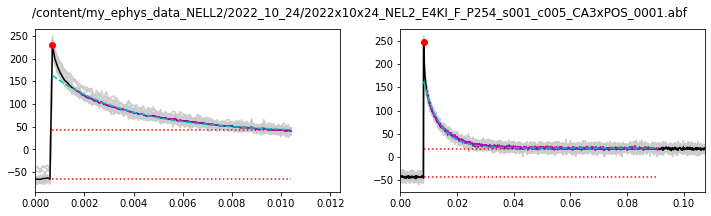

 18%|█▊        | 38/211 [00:51<02:45,  1.04it/s]

<Figure size 432x288 with 0 Axes>

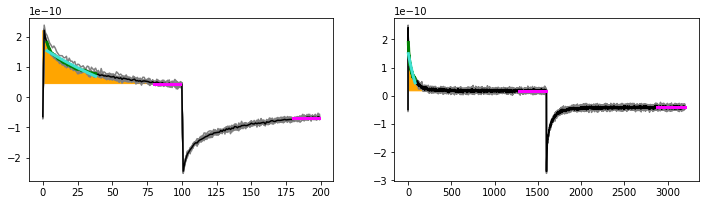

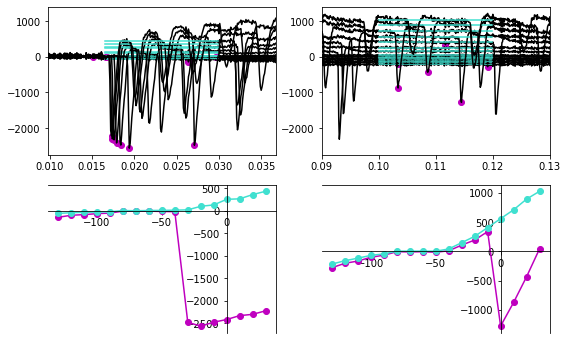

 18%|█▊        | 39/211 [00:53<03:08,  1.10s/it]

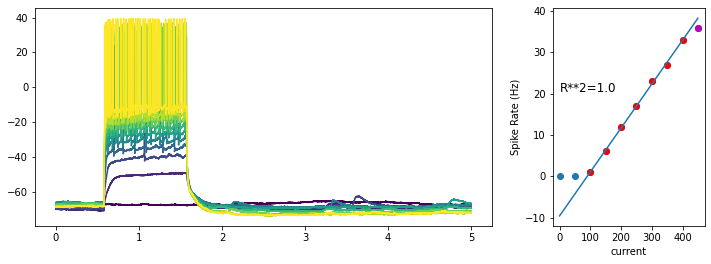

 19%|█▉        | 40/211 [00:55<04:22,  1.53s/it]

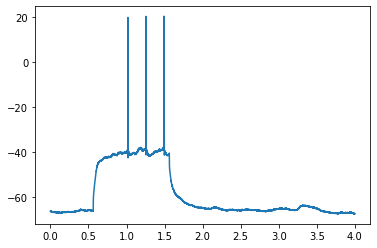

 19%|█▉        | 41/211 [00:55<03:17,  1.16s/it]

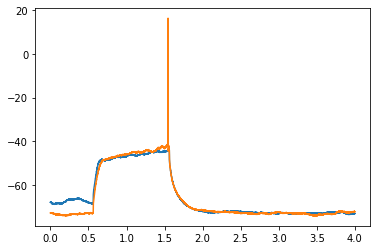

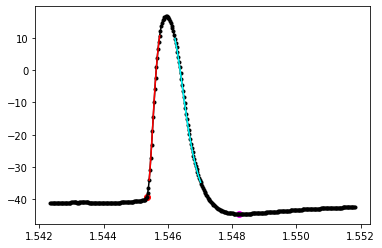

 20%|█▉        | 42/211 [00:59<04:50,  1.72s/it]

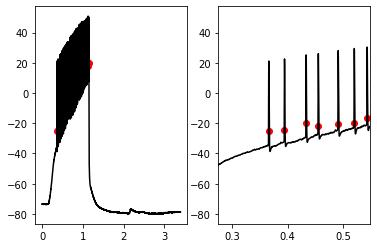

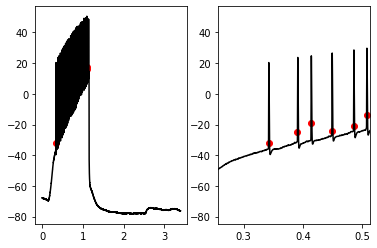

 20%|██        | 43/211 [01:00<04:15,  1.52s/it]

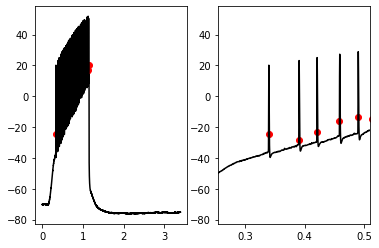

 21%|██▏       | 45/211 [01:02<03:36,  1.30s/it]

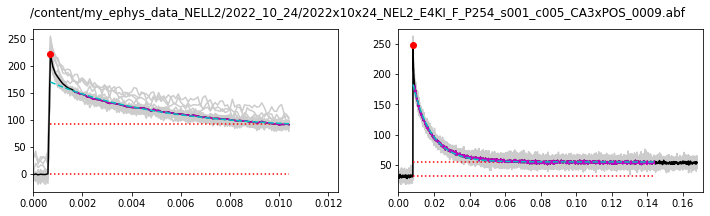

 22%|██▏       | 46/211 [01:03<03:15,  1.18s/it]

<Figure size 432x288 with 0 Axes>

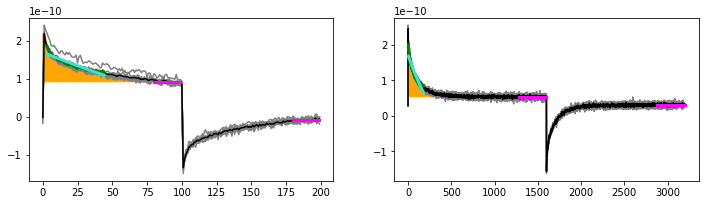

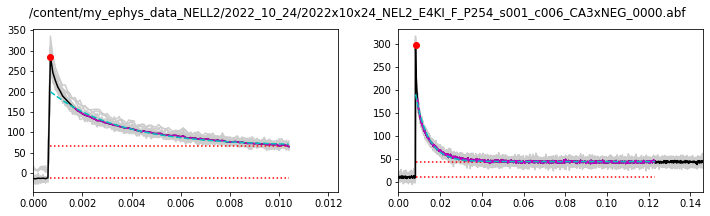

 22%|██▏       | 47/211 [01:04<03:13,  1.18s/it]

<Figure size 432x288 with 0 Axes>

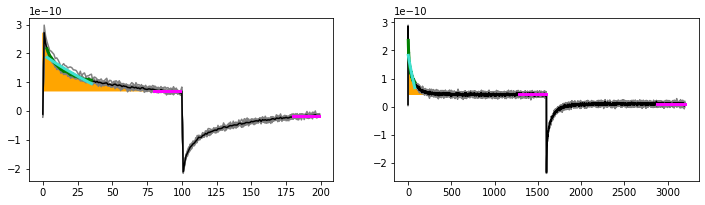

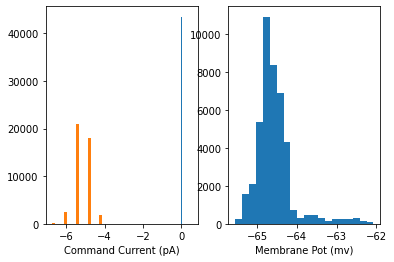

 23%|██▎       | 48/211 [01:04<02:49,  1.04s/it]

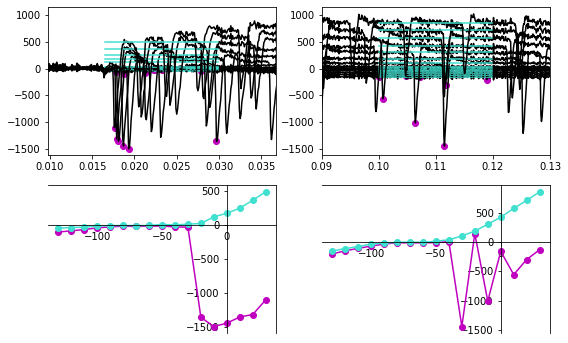

 23%|██▎       | 49/211 [01:06<03:01,  1.12s/it]

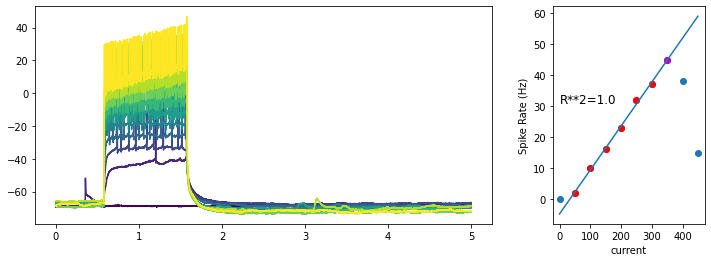

 24%|██▎       | 50/211 [01:08<04:10,  1.55s/it]

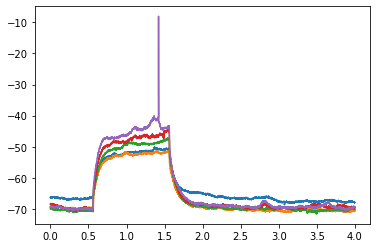

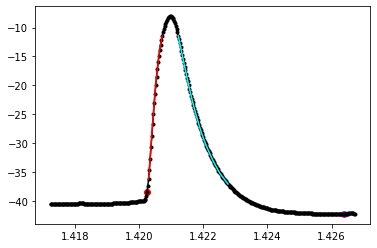

 24%|██▍       | 51/211 [01:12<05:47,  2.17s/it]

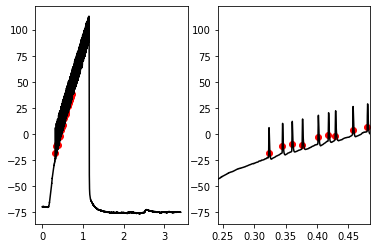

 25%|██▌       | 53/211 [01:14<04:13,  1.60s/it]

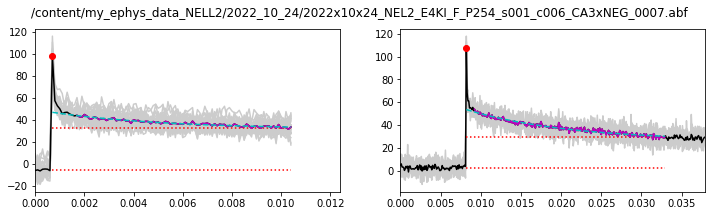

 26%|██▌       | 54/211 [01:15<03:38,  1.39s/it]

<Figure size 432x288 with 0 Axes>

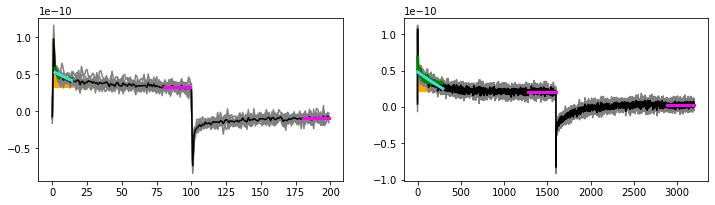

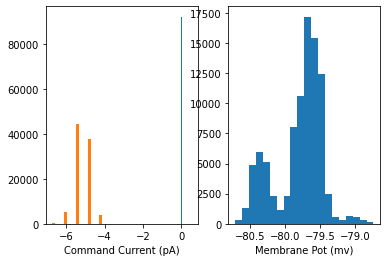

 26%|██▌       | 55/211 [01:16<03:12,  1.24s/it]

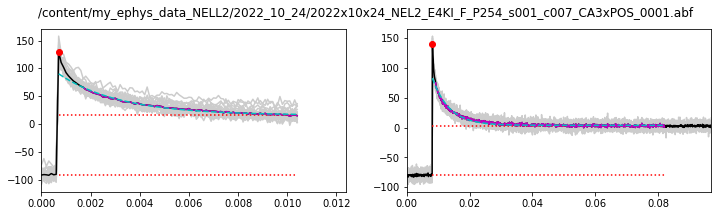

 27%|██▋       | 56/211 [01:17<02:55,  1.13s/it]

<Figure size 432x288 with 0 Axes>

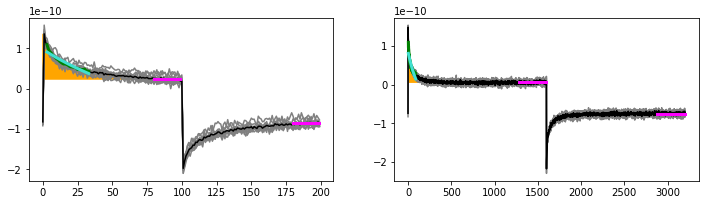

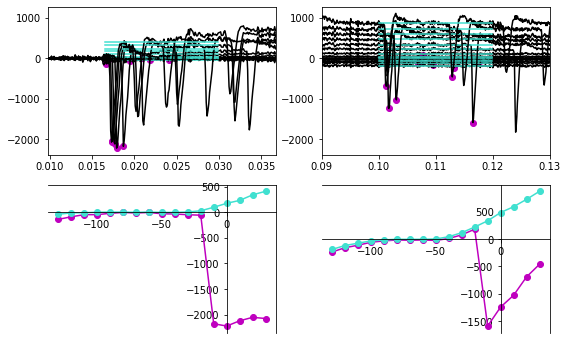

 27%|██▋       | 57/211 [01:18<03:07,  1.21s/it]

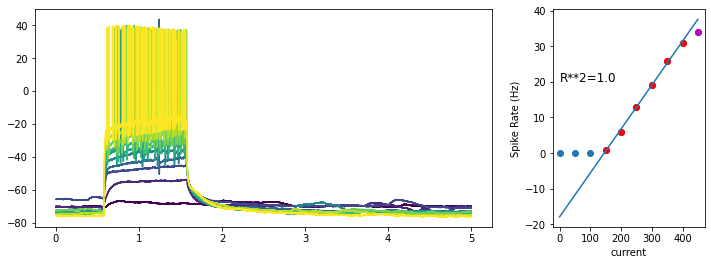

 27%|██▋       | 58/211 [01:21<04:07,  1.62s/it]

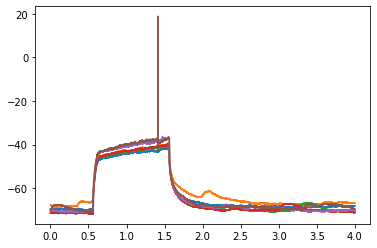

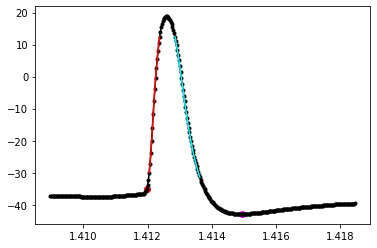

 28%|██▊       | 59/211 [01:24<05:48,  2.29s/it]

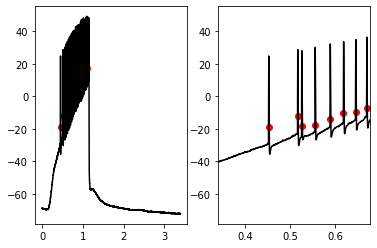

 29%|██▉       | 61/211 [01:26<04:08,  1.66s/it]

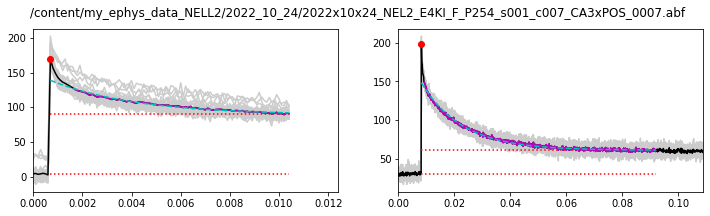

 29%|██▉       | 62/211 [01:27<03:34,  1.44s/it]

<Figure size 432x288 with 0 Axes>

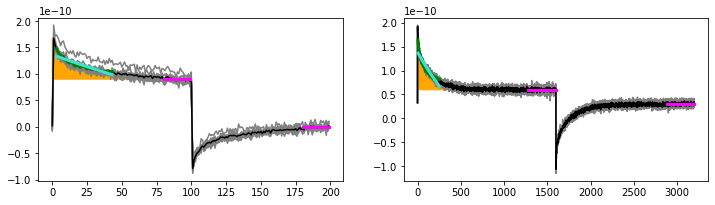

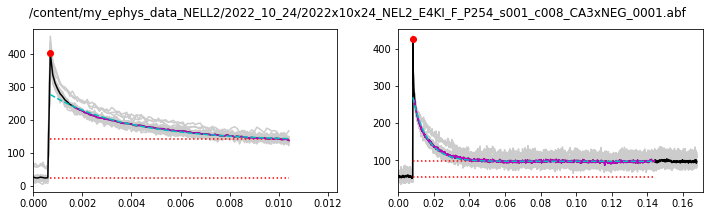

 30%|██▉       | 63/211 [01:28<03:21,  1.36s/it]

<Figure size 432x288 with 0 Axes>

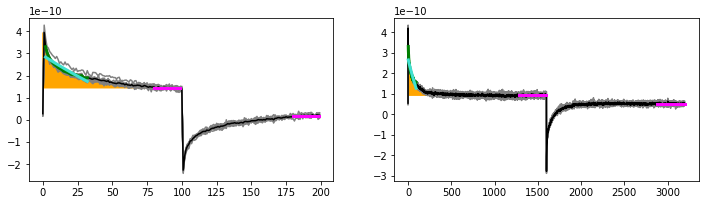

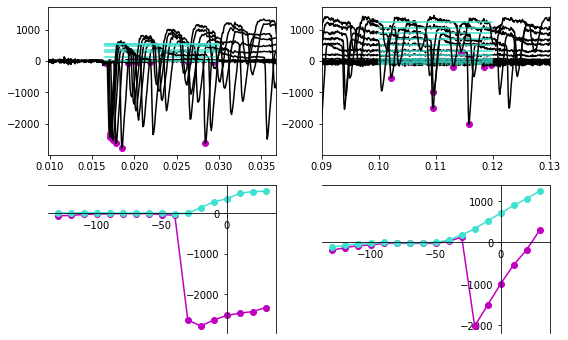

 30%|███       | 64/211 [01:30<03:28,  1.42s/it]

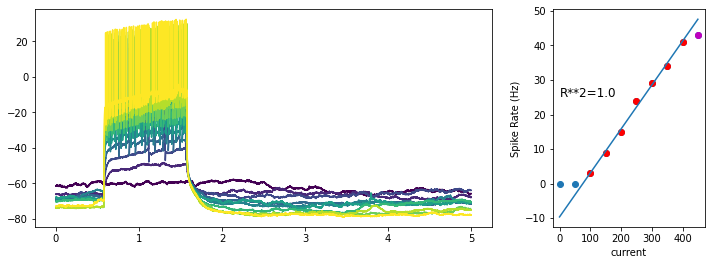

 31%|███       | 65/211 [01:33<04:17,  1.77s/it]

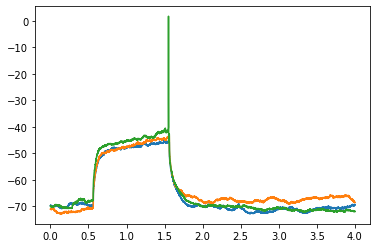

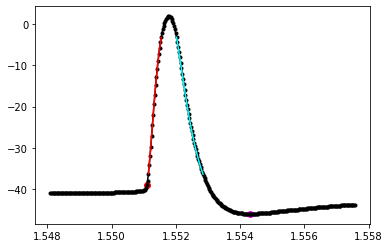

 31%|███▏      | 66/211 [01:36<05:21,  2.22s/it]

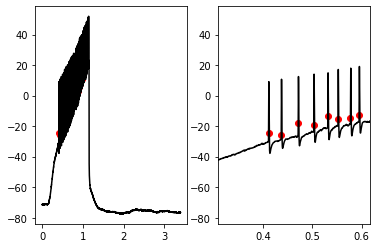

 32%|███▏      | 67/211 [01:36<04:08,  1.72s/it]

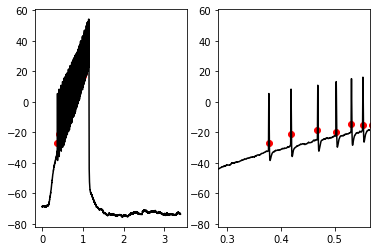

 32%|███▏      | 68/211 [01:37<03:16,  1.38s/it]

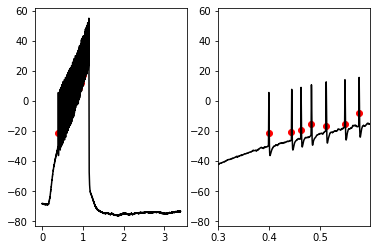

 33%|███▎      | 70/211 [01:39<02:53,  1.23s/it]

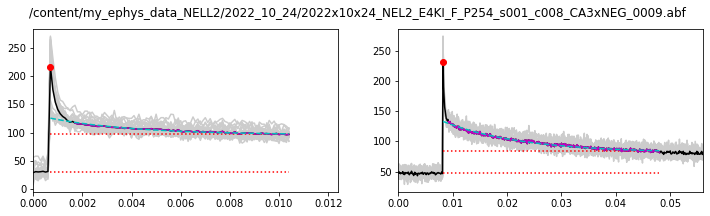

 34%|███▎      | 71/211 [01:40<02:45,  1.18s/it]

<Figure size 432x288 with 0 Axes>

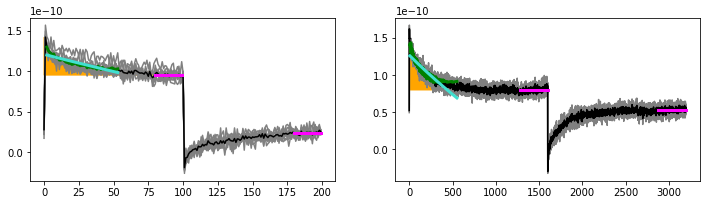

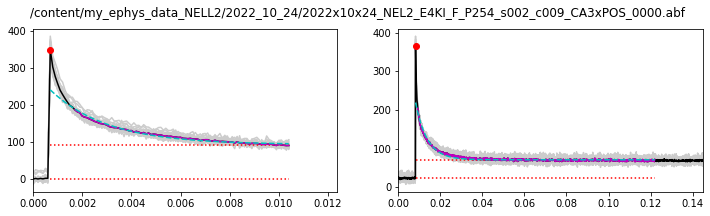

 34%|███▍      | 72/211 [01:41<02:44,  1.18s/it]

<Figure size 432x288 with 0 Axes>

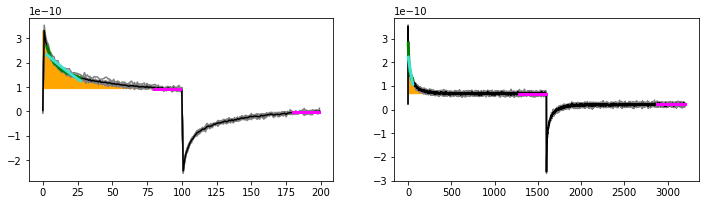

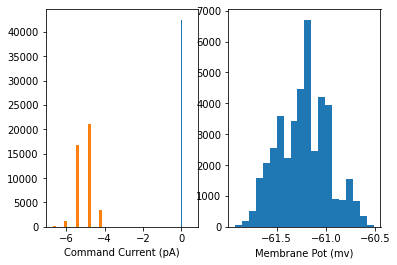

 35%|███▍      | 73/211 [01:42<02:26,  1.06s/it]

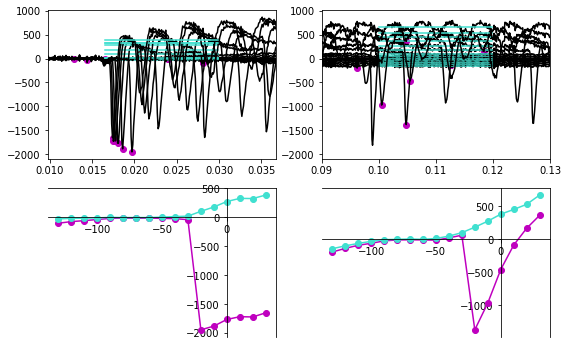

 35%|███▌      | 74/211 [01:43<02:31,  1.11s/it]

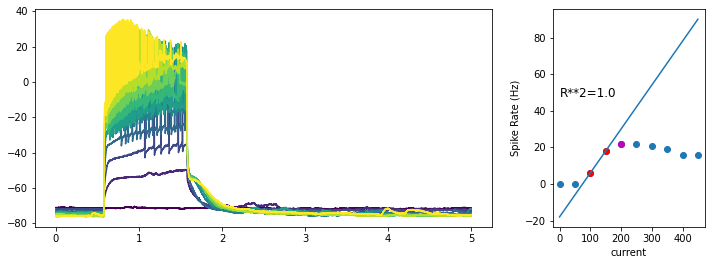

 36%|███▌      | 75/211 [01:46<03:29,  1.54s/it]

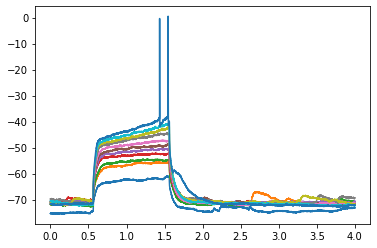

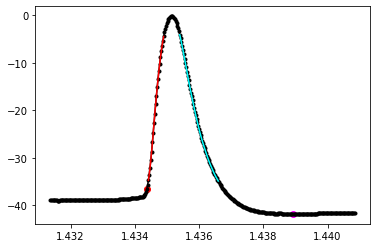

 36%|███▌      | 76/211 [01:51<05:41,  2.53s/it]

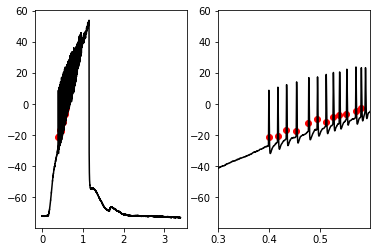

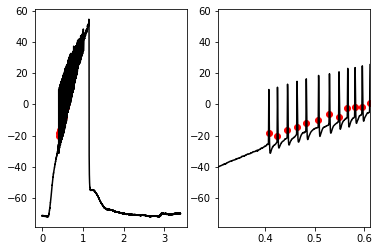

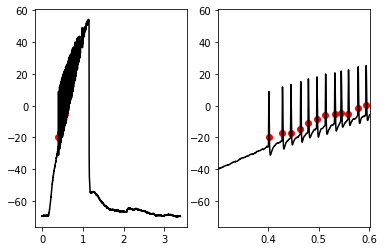

 37%|███▋      | 78/211 [01:54<04:56,  2.23s/it]

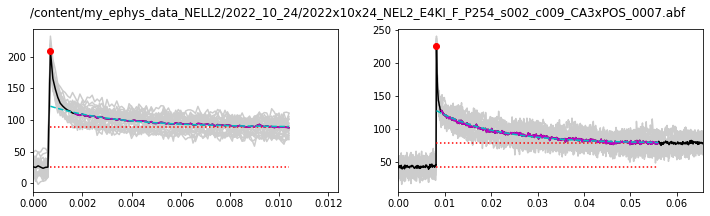

 37%|███▋      | 79/211 [01:55<04:02,  1.84s/it]

<Figure size 432x288 with 0 Axes>

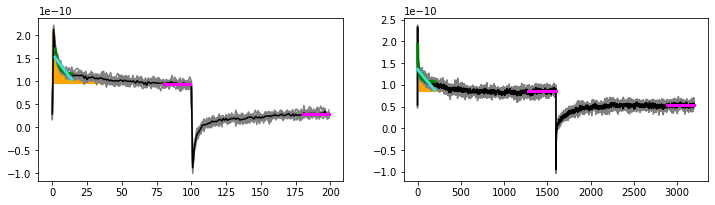

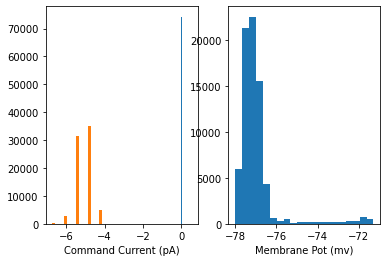

 38%|███▊      | 80/211 [01:56<03:17,  1.51s/it]

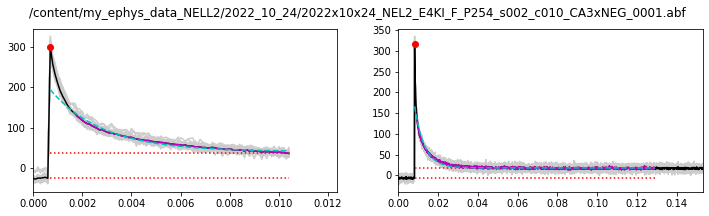

 38%|███▊      | 81/211 [01:57<02:58,  1.38s/it]

<Figure size 432x288 with 0 Axes>

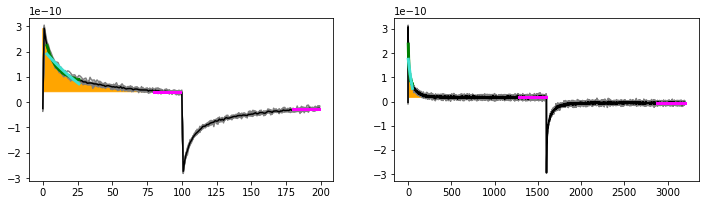

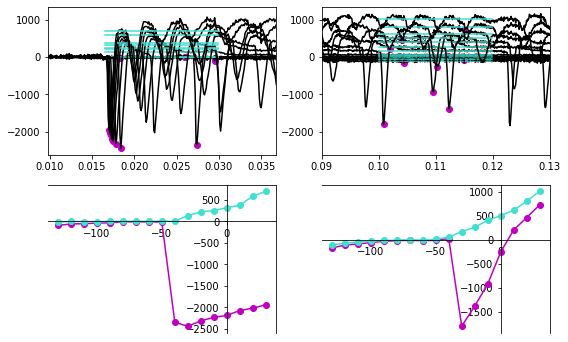

 39%|███▉      | 82/211 [01:59<03:01,  1.41s/it]

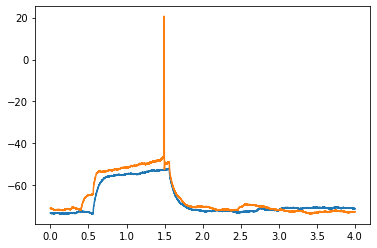

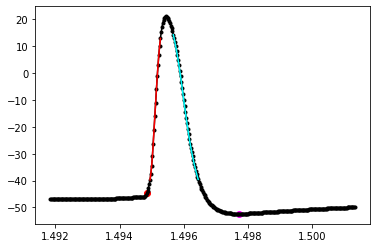

 40%|███▉      | 84/211 [02:02<03:05,  1.46s/it]

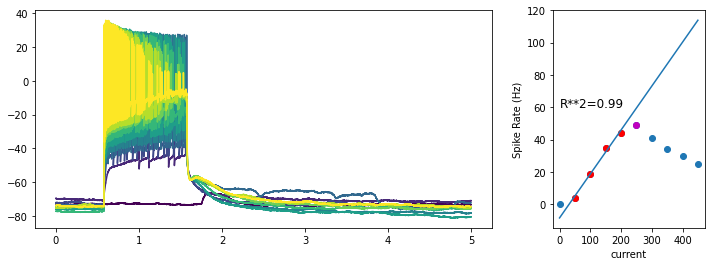

 40%|████      | 85/211 [02:04<03:39,  1.74s/it]

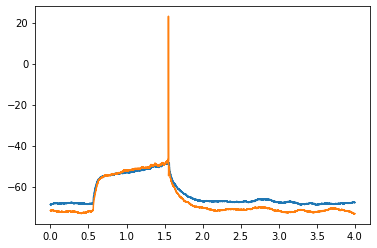

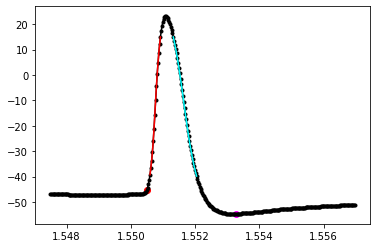

 41%|████      | 86/211 [02:08<04:26,  2.13s/it]

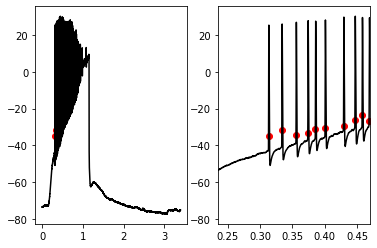

 41%|████      | 87/211 [02:08<03:31,  1.71s/it]

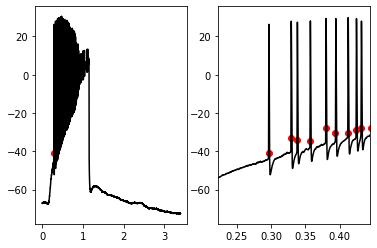

 42%|████▏     | 88/211 [02:09<02:50,  1.39s/it]

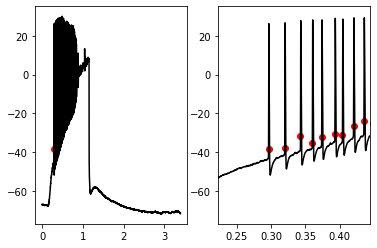

 42%|████▏     | 89/211 [02:09<02:20,  1.15s/it]

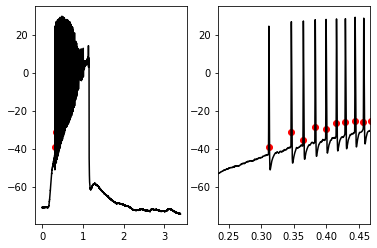

 43%|████▎     | 91/211 [02:11<02:12,  1.10s/it]

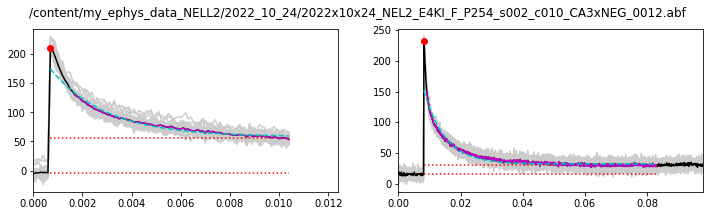

 44%|████▎     | 92/211 [02:12<02:04,  1.04s/it]

<Figure size 432x288 with 0 Axes>

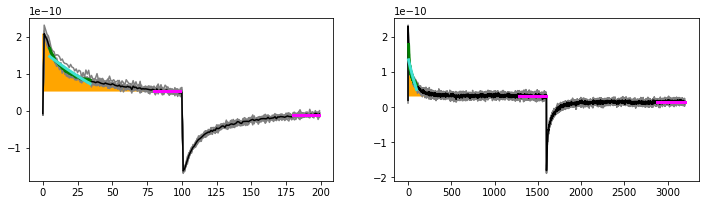

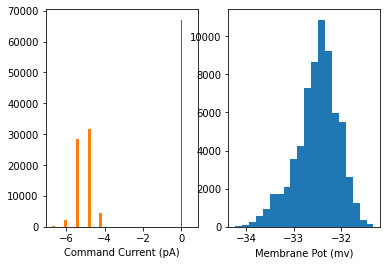

 44%|████▍     | 93/211 [02:13<01:57,  1.01it/s]

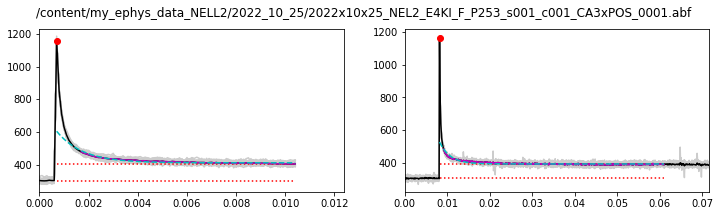

 45%|████▍     | 94/211 [02:14<01:53,  1.03it/s]

<Figure size 432x288 with 0 Axes>

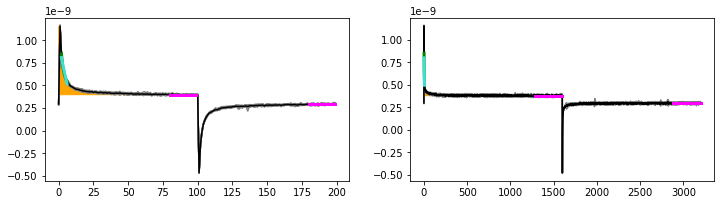

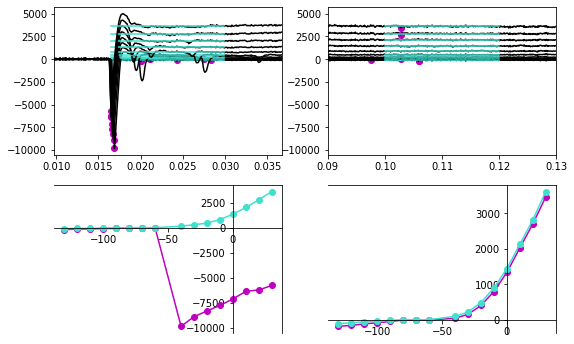

 45%|████▌     | 96/211 [02:17<02:16,  1.19s/it]

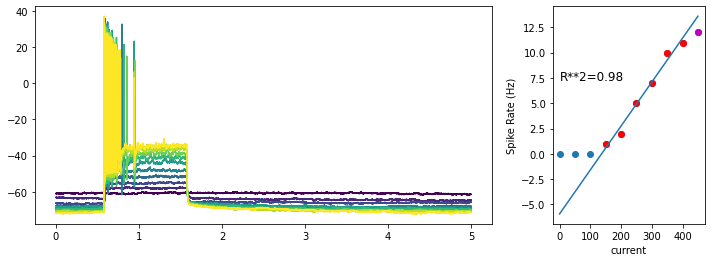

 46%|████▌     | 97/211 [02:19<03:02,  1.60s/it]

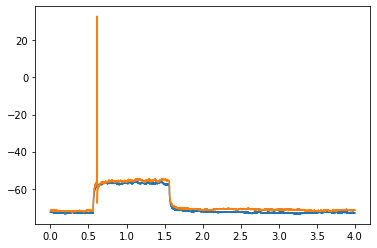

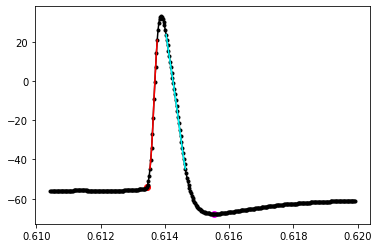

 46%|████▋     | 98/211 [02:23<03:55,  2.08s/it]

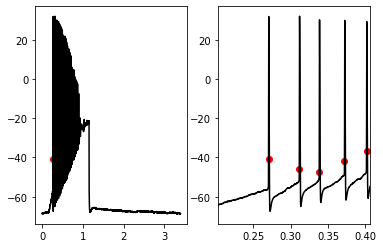

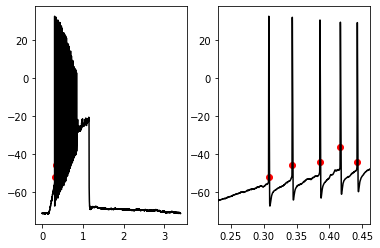

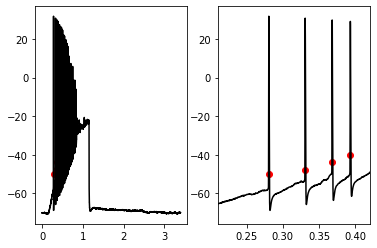

 47%|████▋     | 100/211 [02:26<03:19,  1.80s/it]

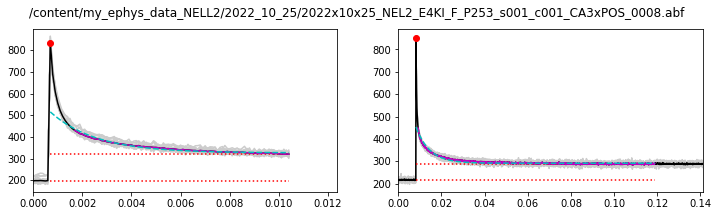

 48%|████▊     | 101/211 [02:26<02:48,  1.53s/it]

<Figure size 432x288 with 0 Axes>

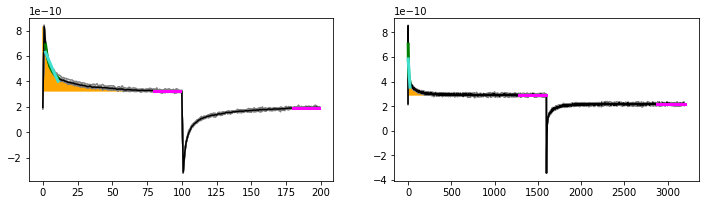

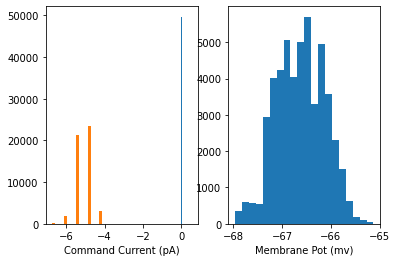

 48%|████▊     | 102/211 [02:27<02:21,  1.30s/it]

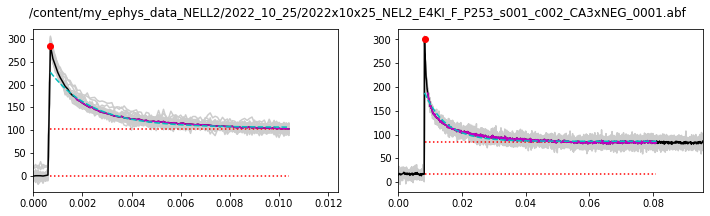

 49%|████▉     | 103/211 [02:28<02:13,  1.23s/it]

<Figure size 432x288 with 0 Axes>

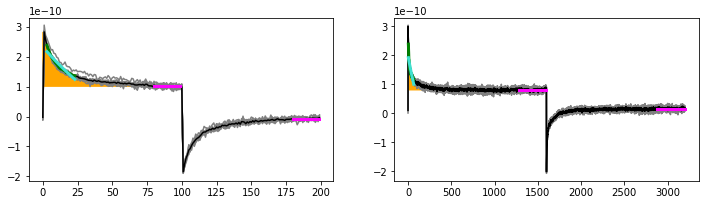

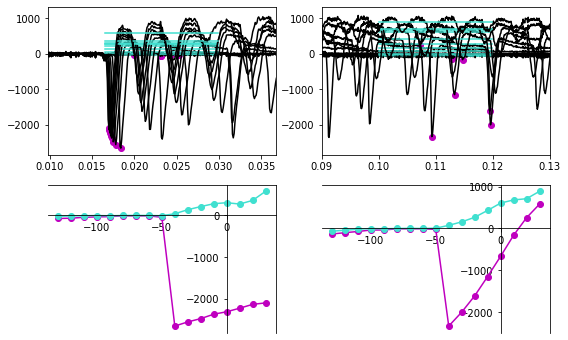

 49%|████▉     | 104/211 [02:30<02:18,  1.29s/it]

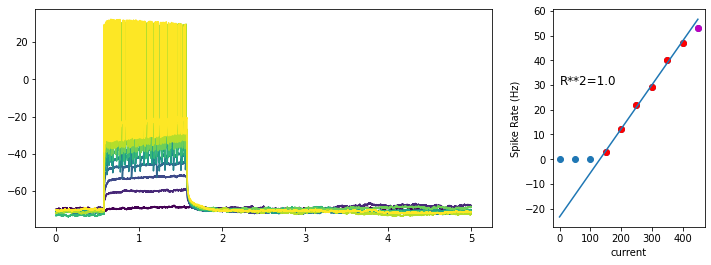

 50%|████▉     | 105/211 [02:32<02:59,  1.69s/it]

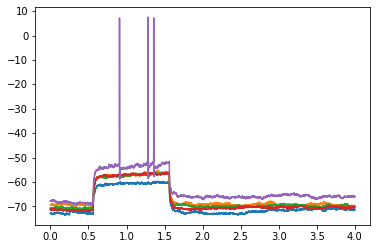

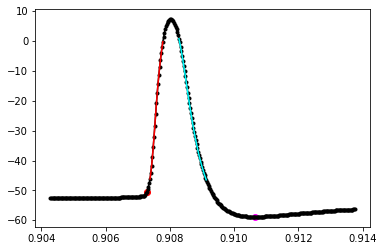

 50%|█████     | 106/211 [02:36<03:58,  2.27s/it]

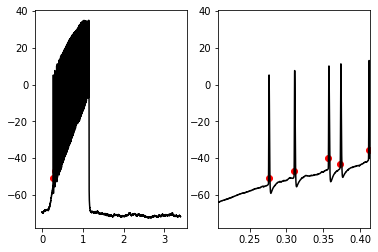

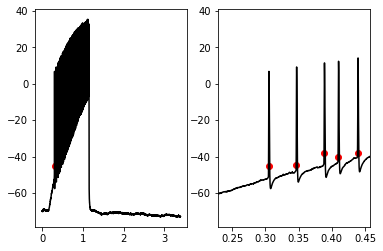

 52%|█████▏    | 109/211 [02:40<02:52,  1.69s/it]

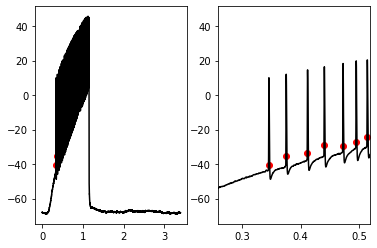

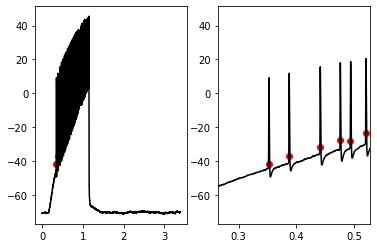

 52%|█████▏    | 110/211 [02:41<02:31,  1.50s/it]

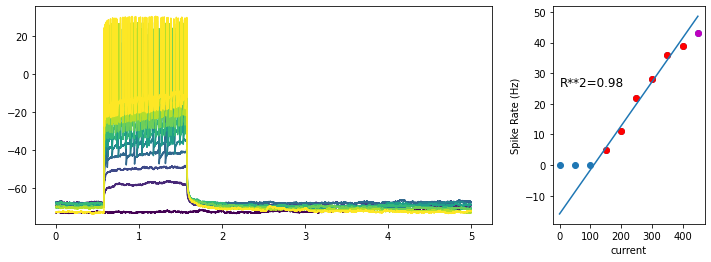

 53%|█████▎    | 111/211 [02:44<03:03,  1.84s/it]

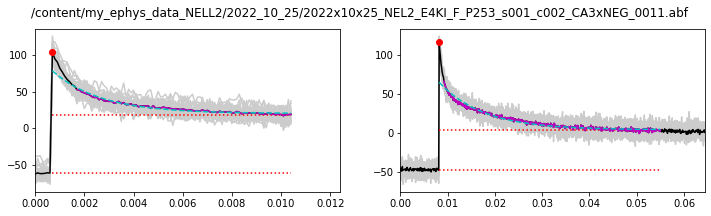

 54%|█████▎    | 113/211 [02:45<01:58,  1.21s/it]

<Figure size 432x288 with 0 Axes>

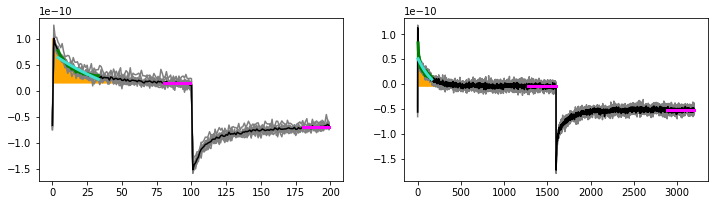

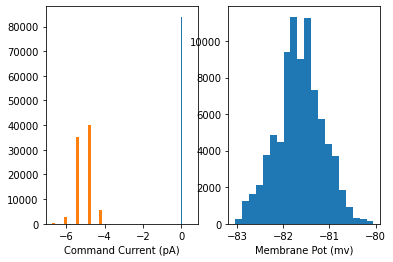

 54%|█████▍    | 114/211 [02:46<01:49,  1.13s/it]

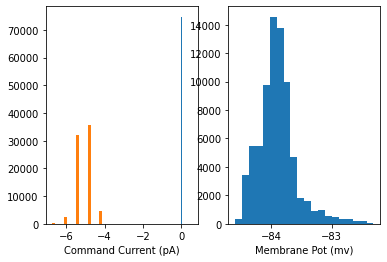

 55%|█████▍    | 115/211 [02:46<01:32,  1.04it/s]

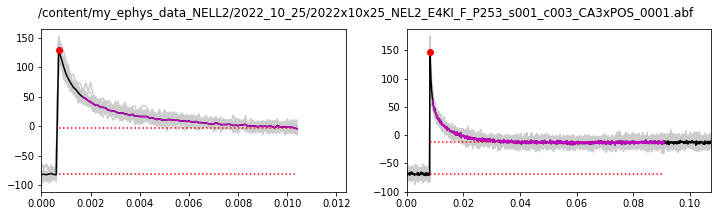

 55%|█████▍    | 116/211 [02:47<01:30,  1.05it/s]

<Figure size 432x288 with 0 Axes>

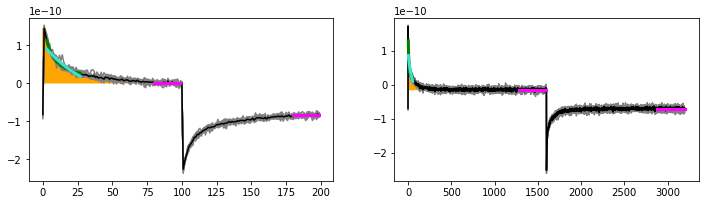

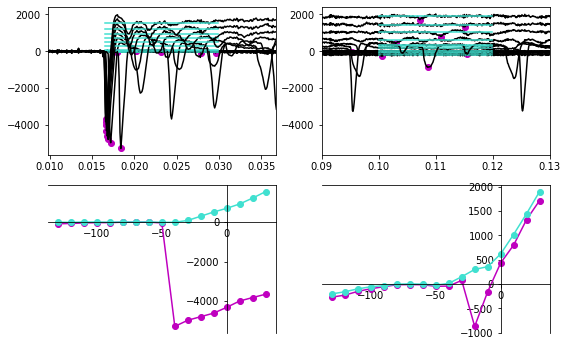

 55%|█████▌    | 117/211 [02:49<01:43,  1.10s/it]

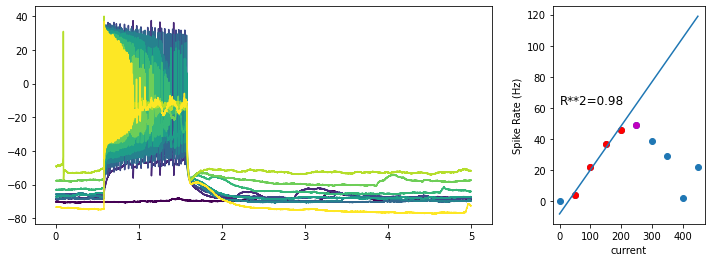

 56%|█████▌    | 118/211 [02:51<02:21,  1.52s/it]

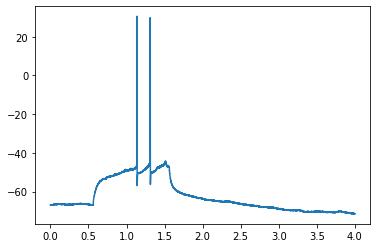

 56%|█████▋    | 119/211 [02:52<01:51,  1.21s/it]

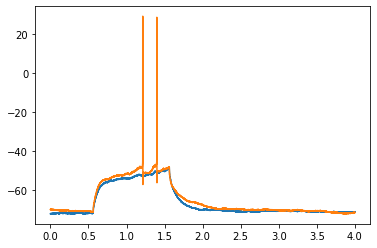

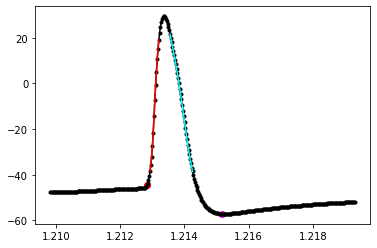

 57%|█████▋    | 120/211 [02:55<02:38,  1.74s/it]

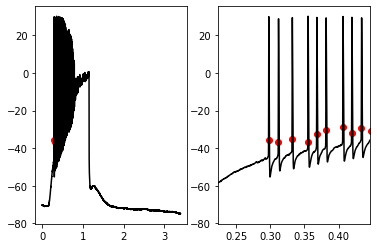

 58%|█████▊    | 122/211 [02:57<02:05,  1.41s/it]

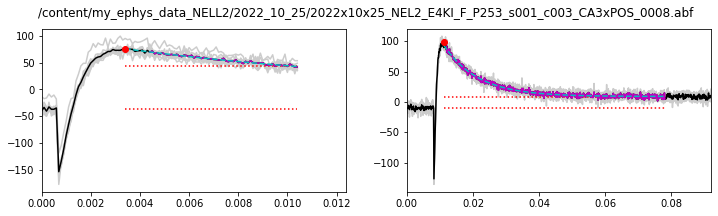

 58%|█████▊    | 123/211 [02:57<01:38,  1.12s/it]

/n error on:  my_ephys_data_NELL2/2022_10_25/2022x10x25_NEL2_E4KI_F_P253_s001_c003_CA3xPOS_0008.abf


<Figure size 432x288 with 0 Axes>

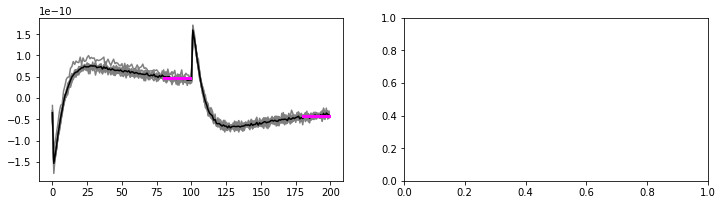

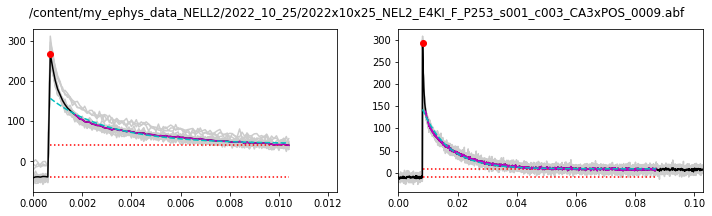

 59%|█████▉    | 124/211 [02:58<01:43,  1.19s/it]

<Figure size 432x288 with 0 Axes>

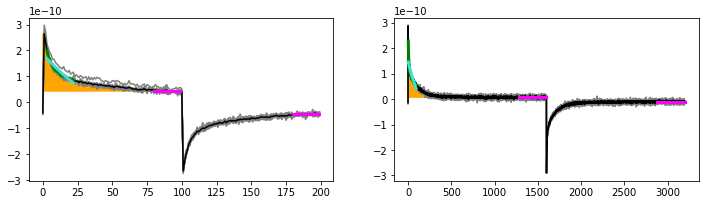

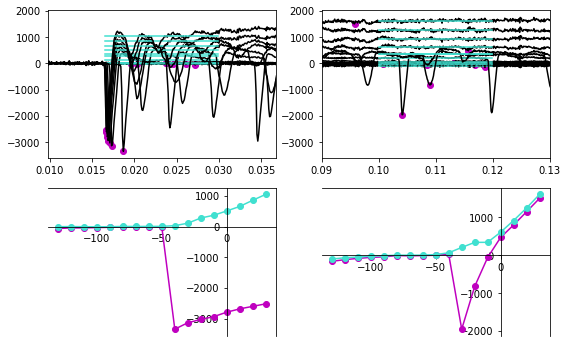

 59%|█████▉    | 125/211 [03:00<01:49,  1.28s/it]

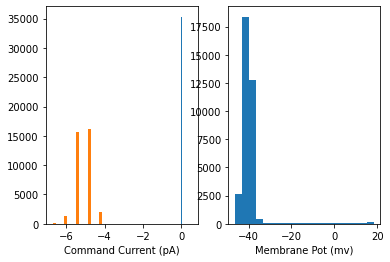

 60%|█████▉    | 126/211 [03:00<01:28,  1.04s/it]

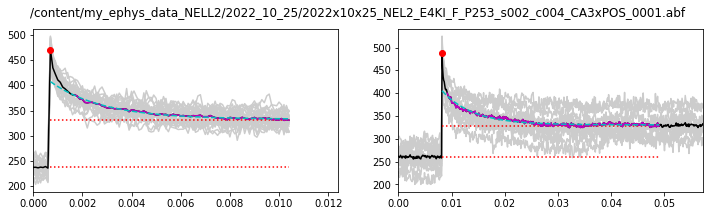

 60%|██████    | 127/211 [03:01<01:25,  1.01s/it]

<Figure size 432x288 with 0 Axes>

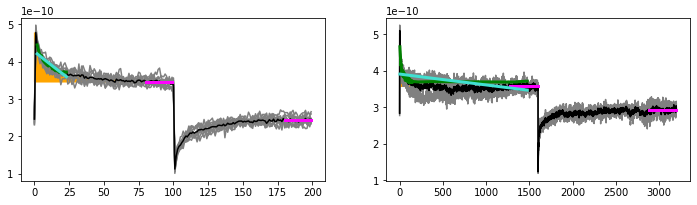

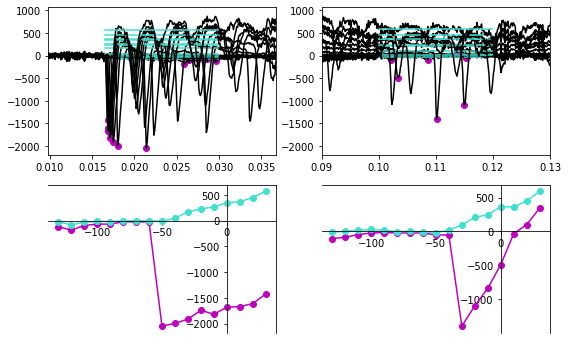

 61%|██████    | 128/211 [03:03<01:40,  1.21s/it]

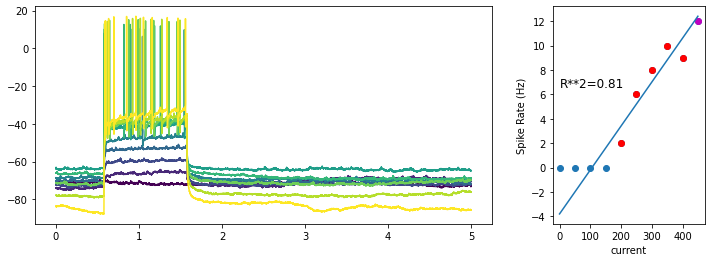

 62%|██████▏   | 130/211 [03:06<01:42,  1.26s/it]

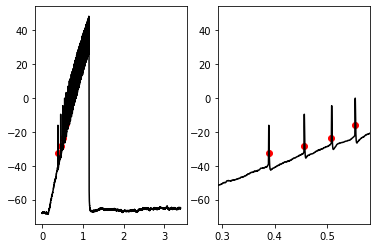

 64%|██████▍   | 135/211 [03:09<01:15,  1.01it/s]

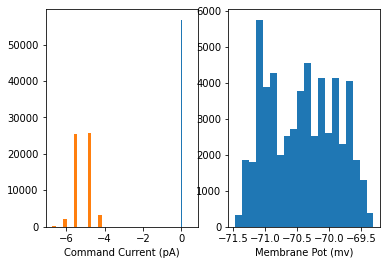

 64%|██████▍   | 136/211 [03:10<01:05,  1.15it/s]

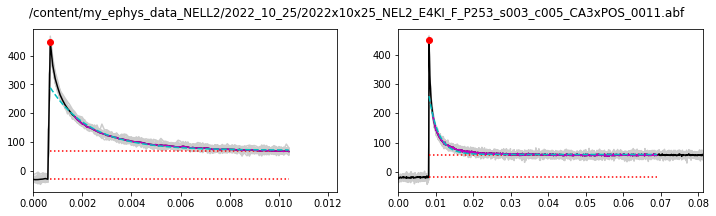

 65%|██████▍   | 137/211 [03:11<01:08,  1.08it/s]

<Figure size 432x288 with 0 Axes>

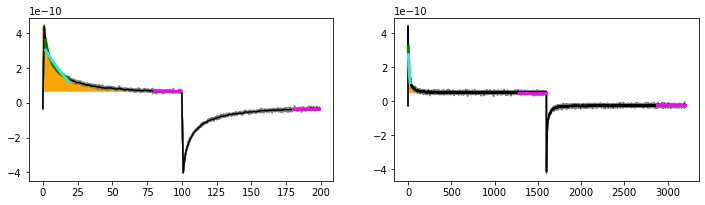

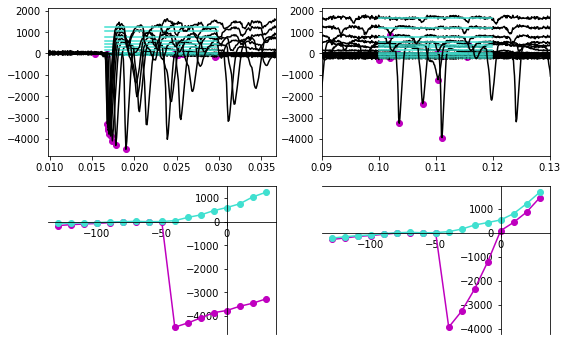

 65%|██████▌   | 138/211 [03:12<01:18,  1.08s/it]

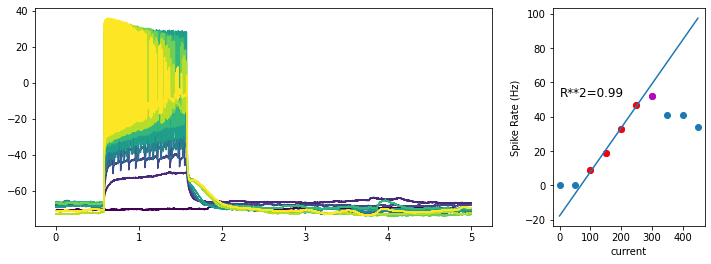

 66%|██████▌   | 139/211 [03:15<01:47,  1.49s/it]

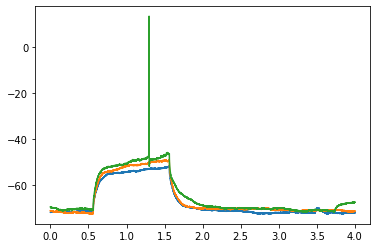

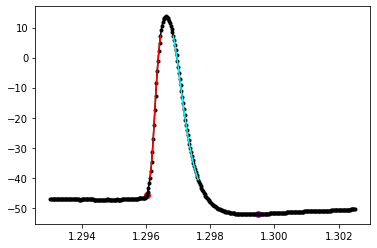

 66%|██████▋   | 140/211 [03:18<02:21,  1.99s/it]

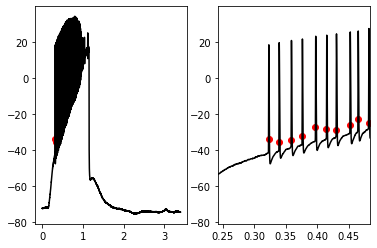

 67%|██████▋   | 142/211 [03:20<01:46,  1.55s/it]

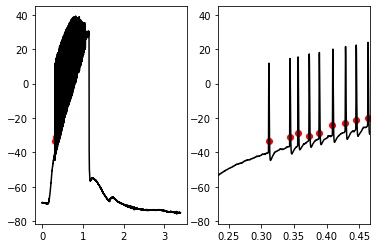

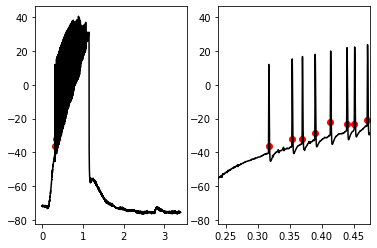

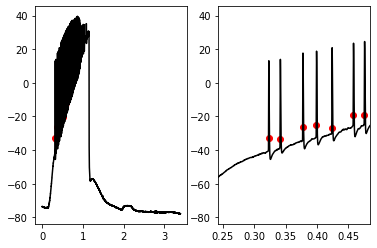

 68%|██████▊   | 143/211 [03:22<01:50,  1.62s/it]

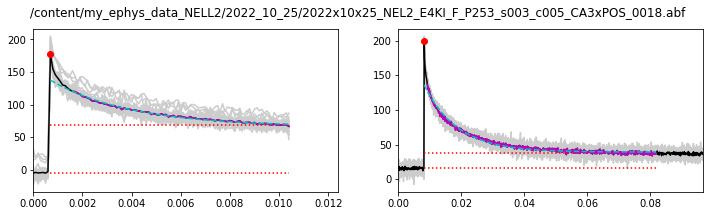

 68%|██████▊   | 144/211 [03:23<01:35,  1.43s/it]

<Figure size 432x288 with 0 Axes>

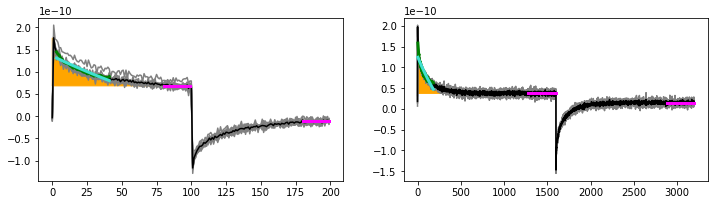

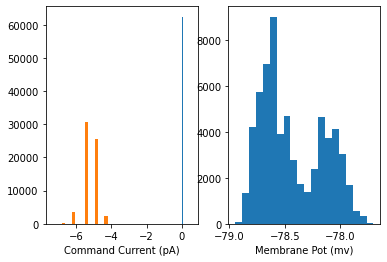

 69%|██████▊   | 145/211 [03:24<01:21,  1.24s/it]

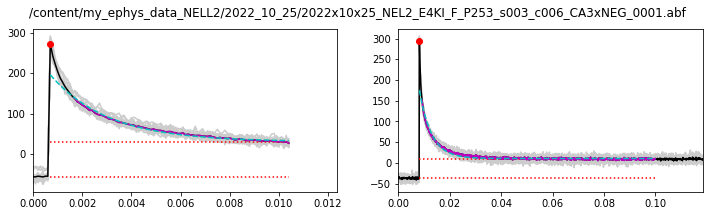

 69%|██████▉   | 146/211 [03:25<01:15,  1.15s/it]

<Figure size 432x288 with 0 Axes>

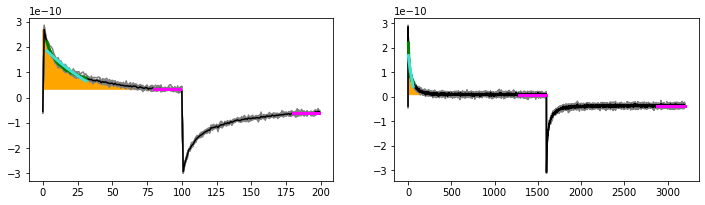

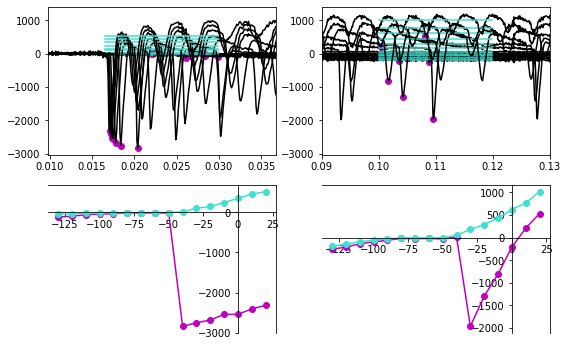

 70%|██████▉   | 147/211 [03:26<01:23,  1.30s/it]

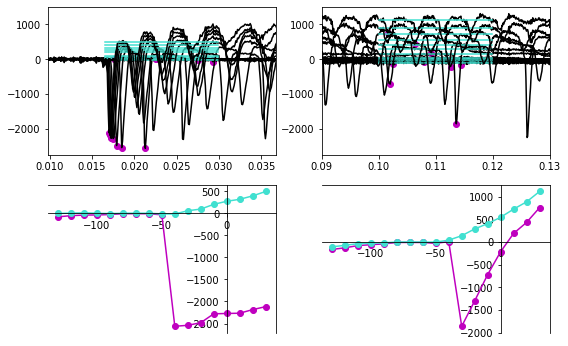

 70%|███████   | 148/211 [03:27<01:20,  1.27s/it]

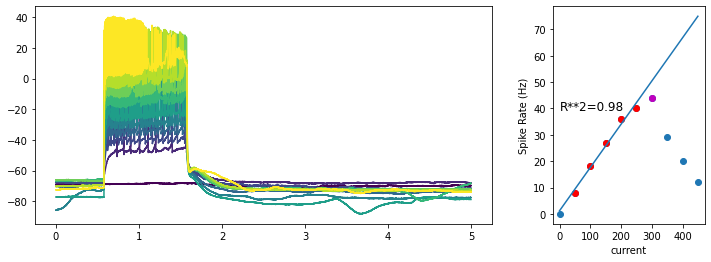

 71%|███████   | 149/211 [03:30<01:42,  1.65s/it]

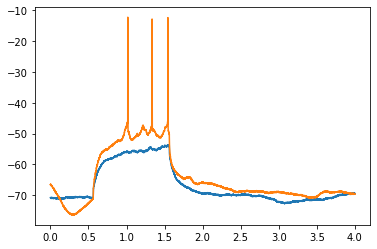

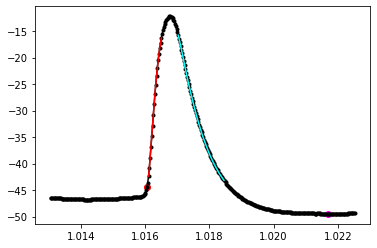

 71%|███████   | 150/211 [03:33<02:07,  2.09s/it]

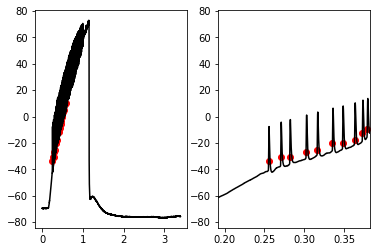

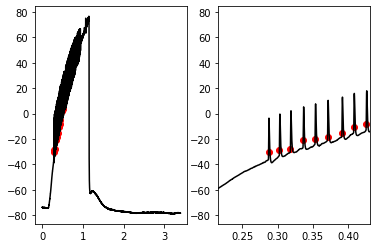

 72%|███████▏  | 152/211 [03:36<01:42,  1.73s/it]

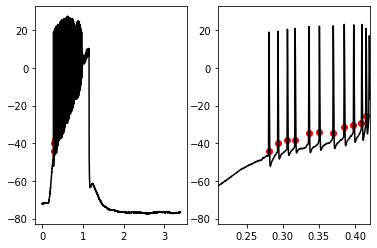

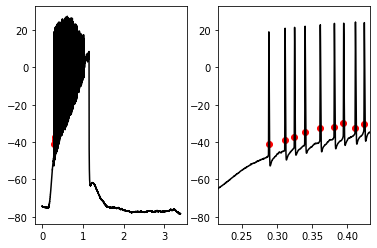

 73%|███████▎  | 154/211 [03:38<01:26,  1.51s/it]

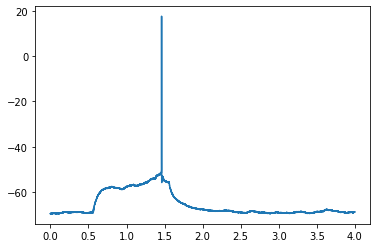

 73%|███████▎  | 155/211 [03:39<01:04,  1.15s/it]

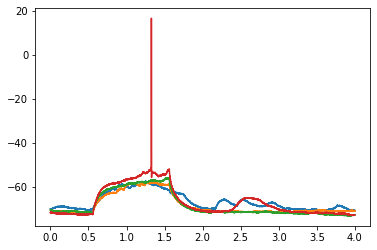

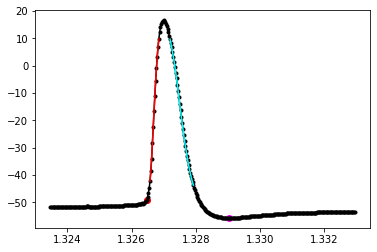

 74%|███████▍  | 156/211 [03:42<01:41,  1.85s/it]

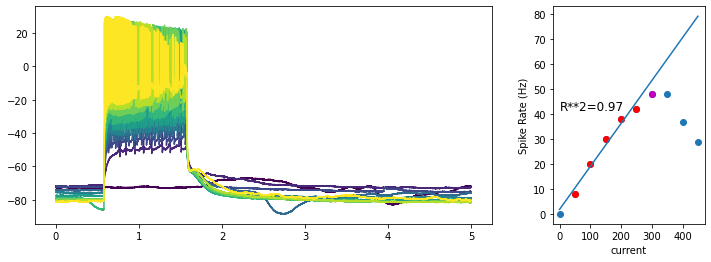

 74%|███████▍  | 157/211 [03:45<01:52,  2.08s/it]

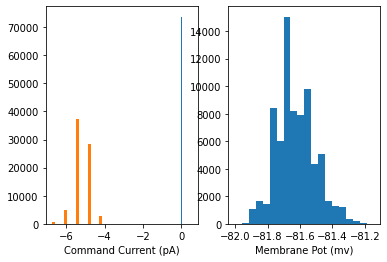

 75%|███████▍  | 158/211 [03:45<01:27,  1.66s/it]

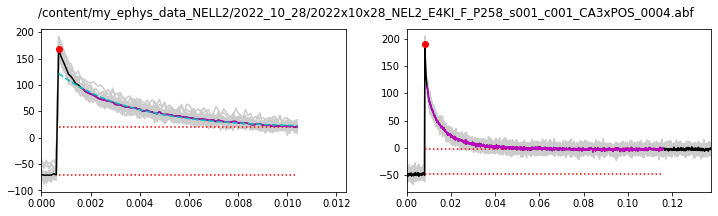

 75%|███████▌  | 159/211 [03:46<01:15,  1.46s/it]

<Figure size 432x288 with 0 Axes>

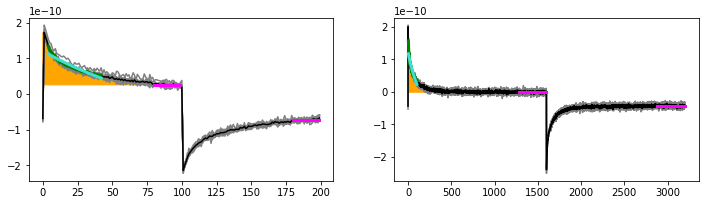

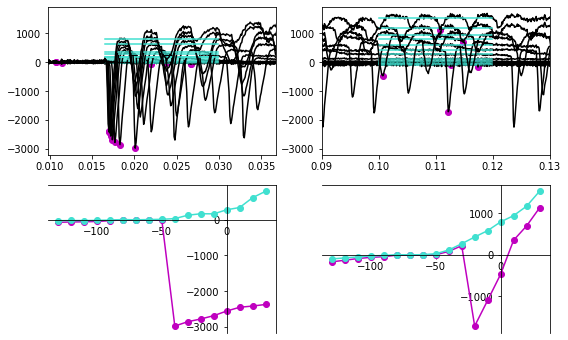

 77%|███████▋  | 162/211 [03:48<00:45,  1.08it/s]

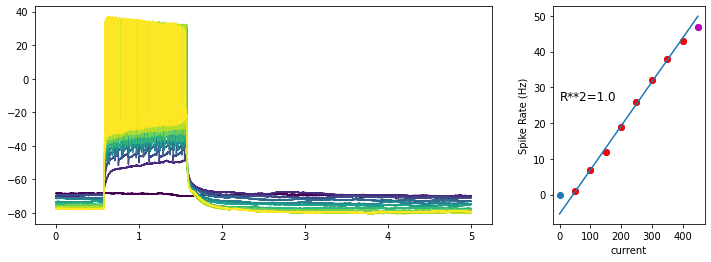

 77%|███████▋  | 163/211 [03:51<01:01,  1.28s/it]

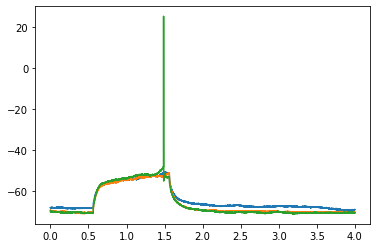

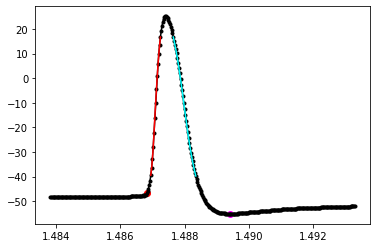

 78%|███████▊  | 164/211 [03:54<01:23,  1.78s/it]

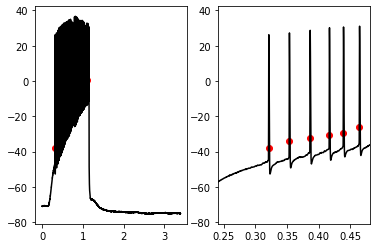

 79%|███████▊  | 166/211 [03:56<01:06,  1.47s/it]

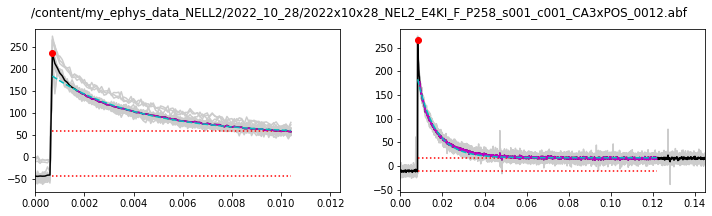

 79%|███████▉  | 167/211 [03:57<00:58,  1.33s/it]

<Figure size 432x288 with 0 Axes>

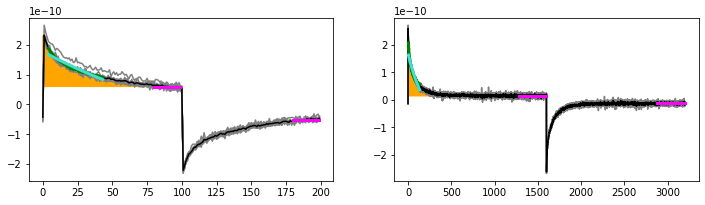

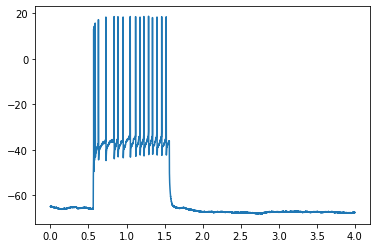

 80%|███████▉  | 168/211 [03:58<00:48,  1.13s/it]

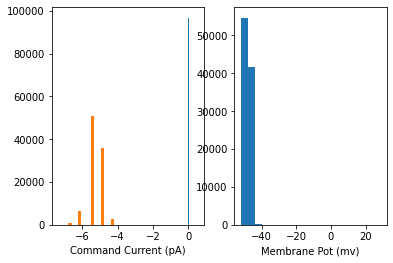

 80%|████████  | 169/211 [03:58<00:40,  1.05it/s]

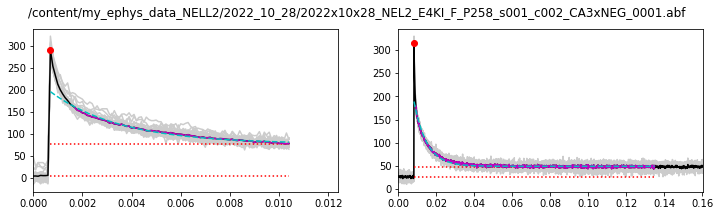

 81%|████████  | 170/211 [03:59<00:41,  1.00s/it]

<Figure size 432x288 with 0 Axes>

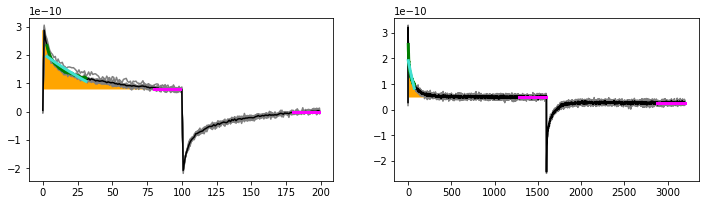

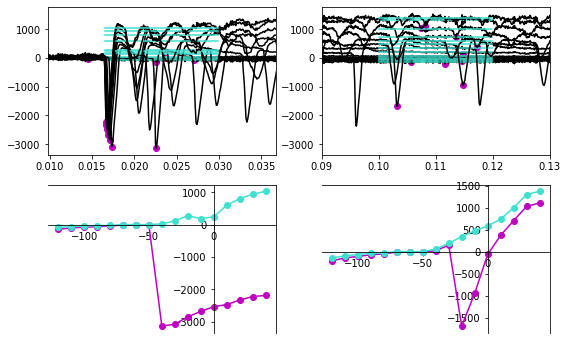

 81%|████████  | 171/211 [04:01<00:46,  1.16s/it]

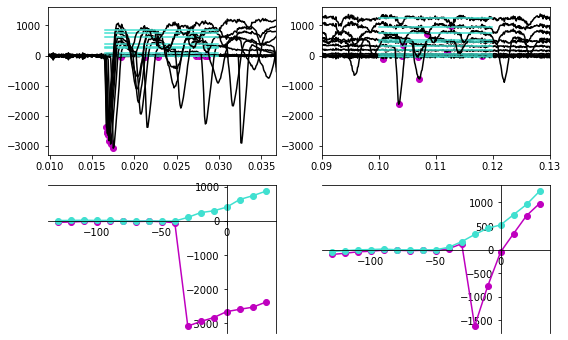

 82%|████████▏ | 172/211 [04:02<00:46,  1.18s/it]

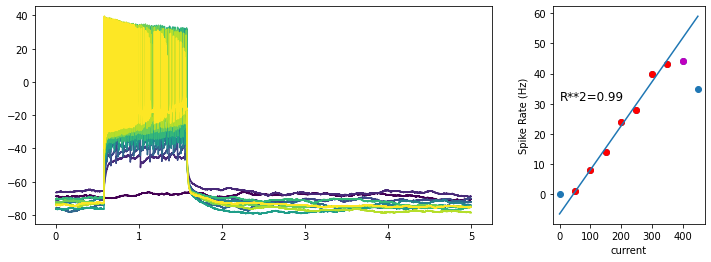

 82%|████████▏ | 174/211 [04:05<00:45,  1.24s/it]

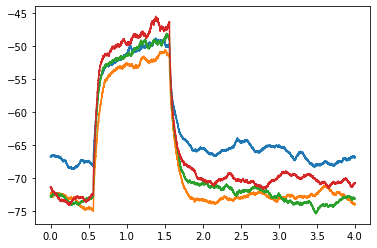

 83%|████████▎ | 175/211 [04:06<00:44,  1.24s/it]

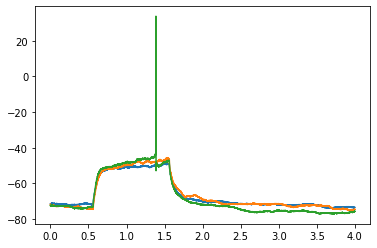

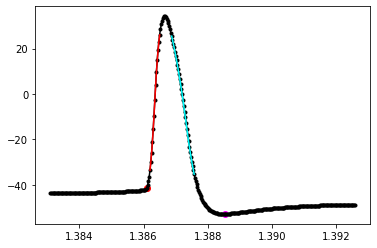

 83%|████████▎ | 176/211 [04:09<01:01,  1.76s/it]

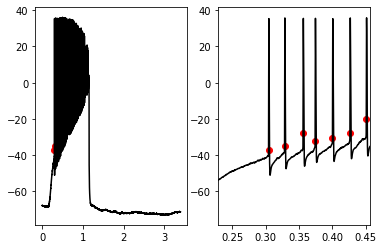

 84%|████████▍ | 177/211 [04:10<00:49,  1.45s/it]

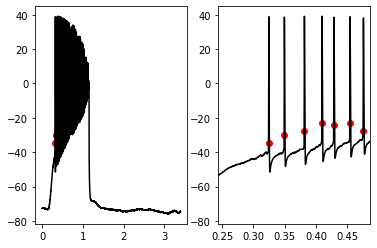

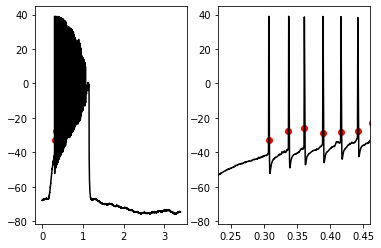

 84%|████████▍ | 178/211 [04:11<00:45,  1.38s/it]

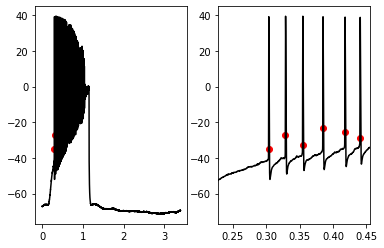

 85%|████████▌ | 180/211 [04:13<00:38,  1.24s/it]

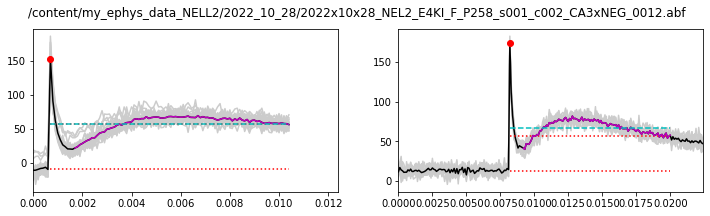

 86%|████████▌ | 181/211 [04:14<00:36,  1.21s/it]

<Figure size 432x288 with 0 Axes>

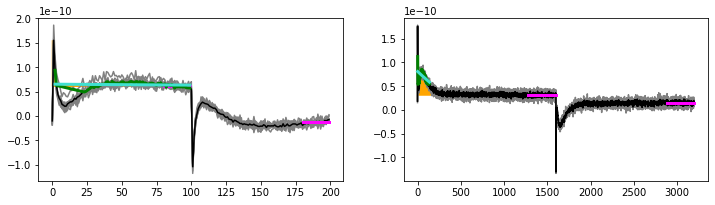

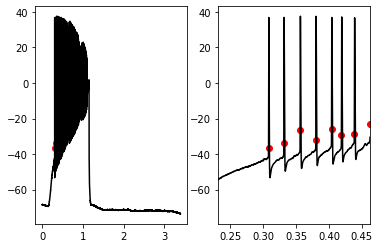

 86%|████████▋ | 182/211 [04:15<00:32,  1.12s/it]

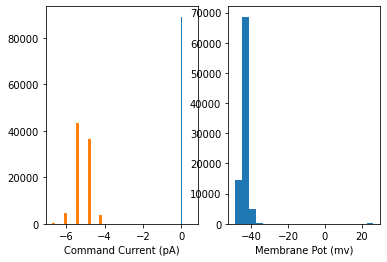

 87%|████████▋ | 183/211 [04:16<00:26,  1.07it/s]

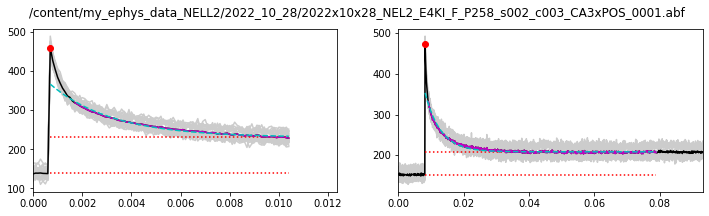

 87%|████████▋ | 184/211 [04:16<00:25,  1.06it/s]

<Figure size 432x288 with 0 Axes>

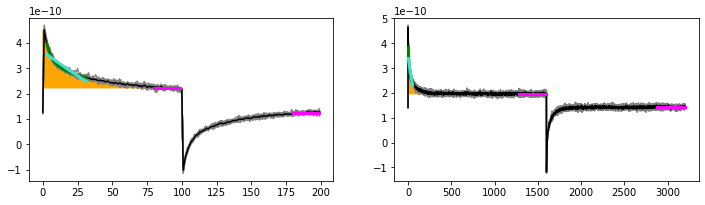

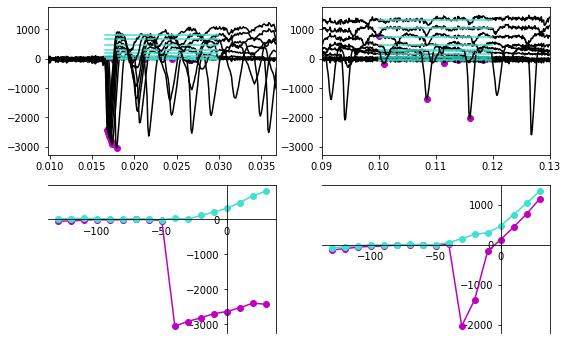

 88%|████████▊ | 185/211 [04:18<00:29,  1.12s/it]

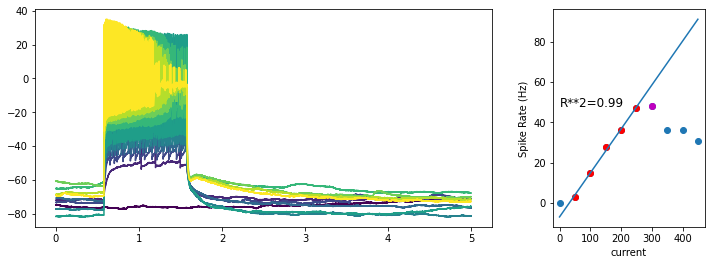

 88%|████████▊ | 186/211 [04:21<00:40,  1.61s/it]

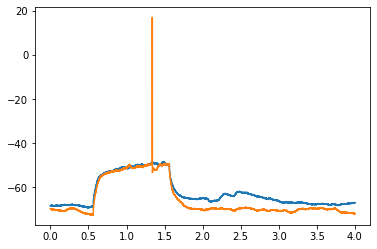

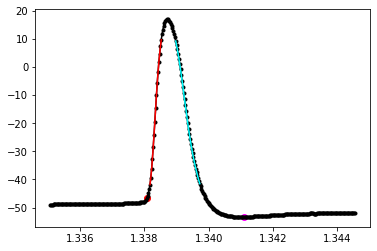

 89%|████████▊ | 187/211 [04:24<00:49,  2.07s/it]

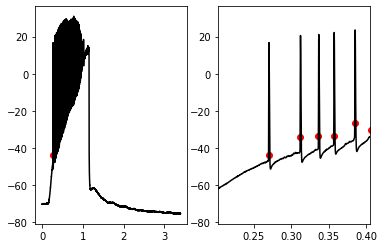

 90%|████████▉ | 189/211 [04:26<00:34,  1.58s/it]

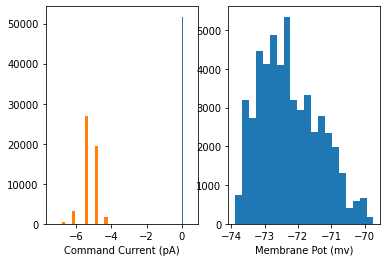

 90%|█████████ | 190/211 [04:26<00:26,  1.25s/it]

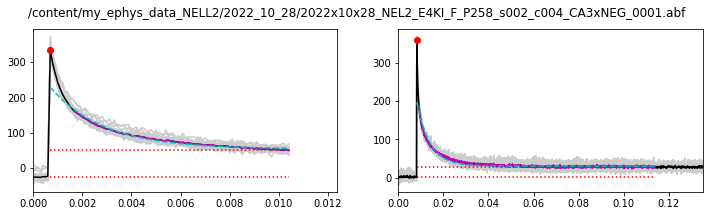

 91%|█████████ | 191/211 [04:28<00:24,  1.21s/it]

<Figure size 432x288 with 0 Axes>

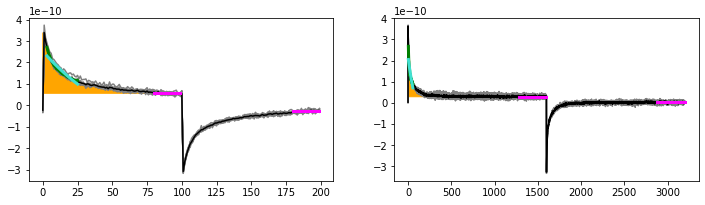

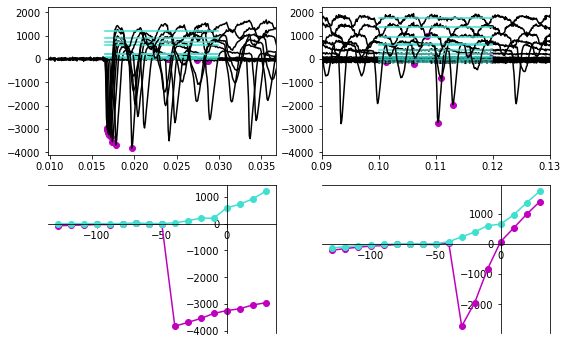

 91%|█████████ | 192/211 [04:29<00:26,  1.39s/it]

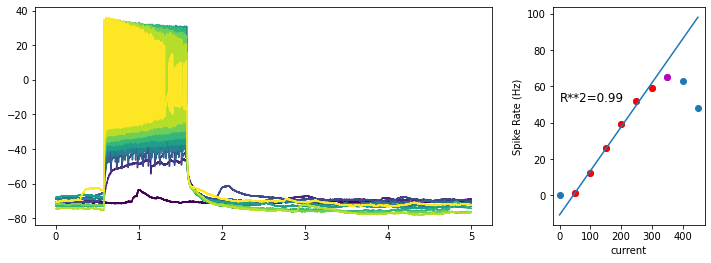

 91%|█████████▏| 193/211 [04:33<00:37,  2.08s/it]

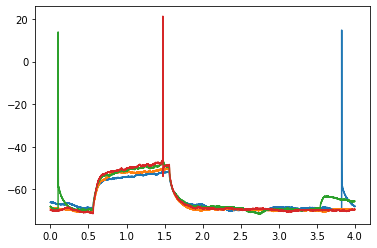

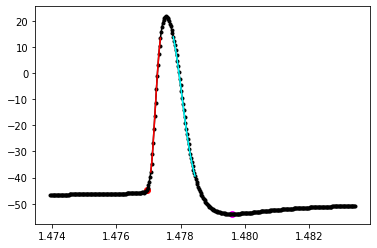

 92%|█████████▏| 194/211 [04:37<00:42,  2.51s/it]

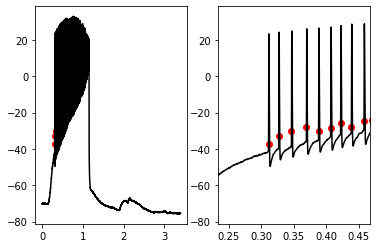

 93%|█████████▎| 196/211 [04:39<00:26,  1.79s/it]

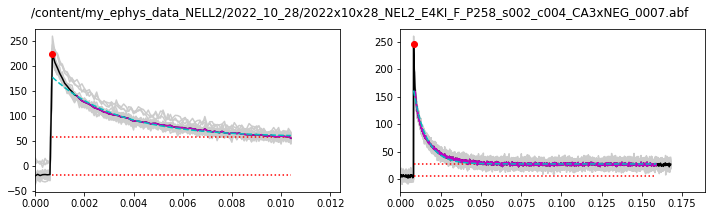

 93%|█████████▎| 197/211 [04:40<00:22,  1.58s/it]

<Figure size 432x288 with 0 Axes>

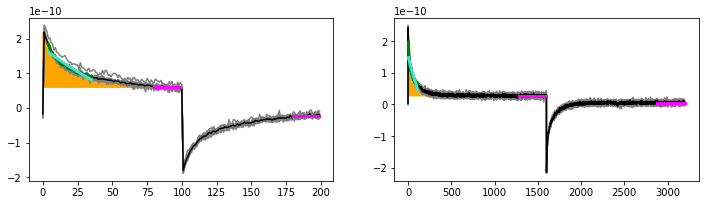

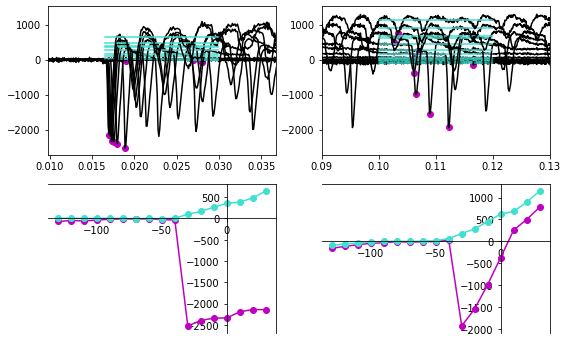

 94%|█████████▍| 198/211 [04:41<00:20,  1.56s/it]

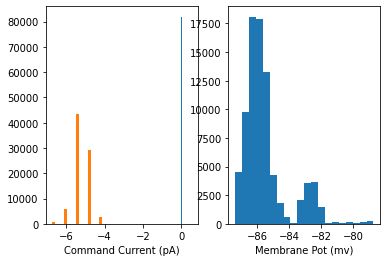

 94%|█████████▍| 199/211 [04:42<00:14,  1.25s/it]

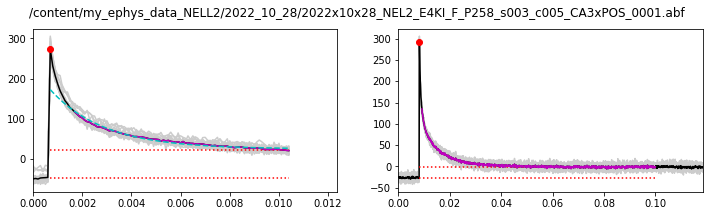

 95%|█████████▍| 200/211 [04:43<00:13,  1.20s/it]

<Figure size 432x288 with 0 Axes>

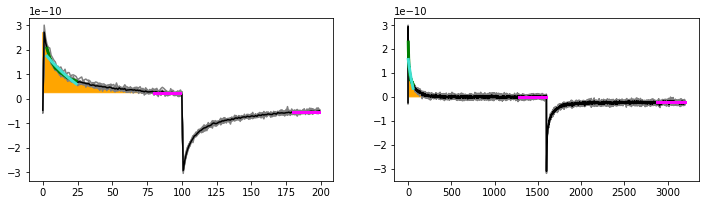

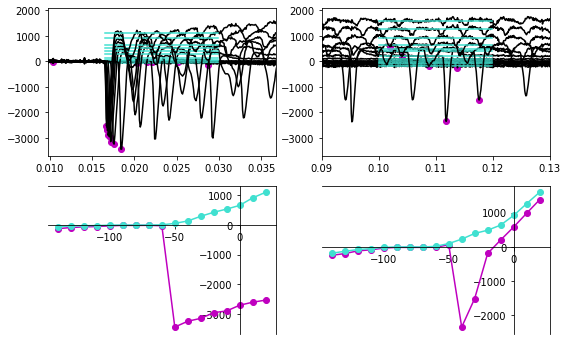

 95%|█████████▌| 201/211 [04:44<00:13,  1.31s/it]

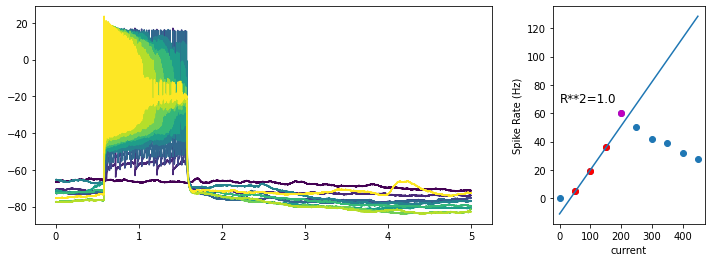

 96%|█████████▌| 202/211 [04:47<00:15,  1.70s/it]

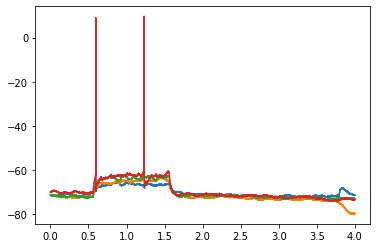

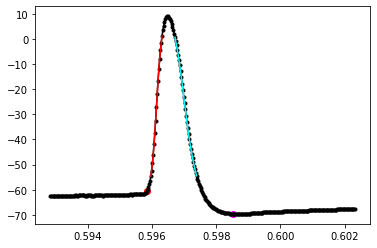

 96%|█████████▌| 203/211 [04:51<00:17,  2.24s/it]

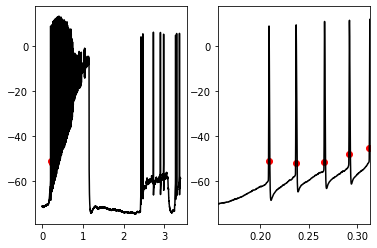

 97%|█████████▋| 205/211 [04:53<00:10,  1.67s/it]

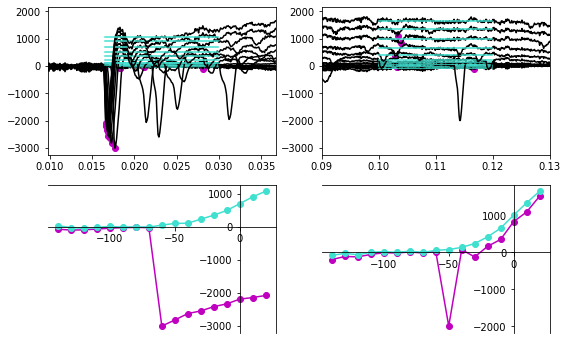

 98%|█████████▊| 207/211 [04:55<00:05,  1.50s/it]

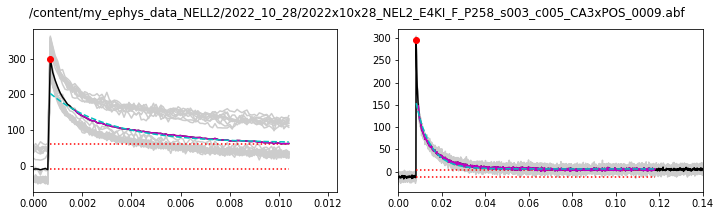

 99%|█████████▉| 209/211 [04:58<00:03,  1.54s/it]

<Figure size 432x288 with 0 Axes>

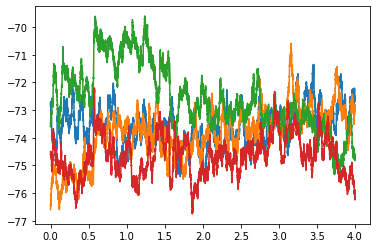

100%|█████████▉| 210/211 [04:59<00:01,  1.44s/it]

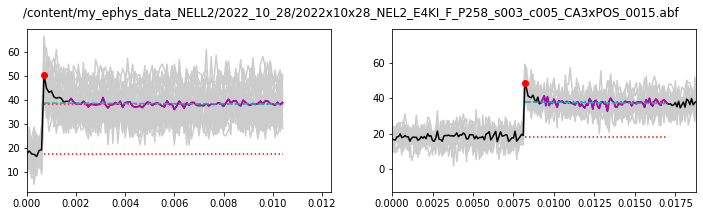

100%|██████████| 211/211 [05:01<00:00,  1.43s/it]


problem_recs
     my_ephys_data_NELL2/2022_10_25/2022x10x25_NEL2_E4KI_F_P253_s001_c003_CA3xPOS_0008.abf
updating: content/Saved_Figs/ (stored 0%)
updating: content/Saved_Figs/Spike_latency/ (stored 0%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s001_c001_CA3xPOS_0005.png (deflated 8%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x25_NEL2_E4KI_F_P253_s001_c001_CA3xPOS_0006.png (deflated 11%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s001_c002_CA3xNEG_0006.png (deflated 8%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s002_c009_CA3xPOS_0005.png (deflated 7%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x24_NEL2_E4KI_F_P254_s002_c010_CA3xNEG_0009.png (deflated 8%)
updating: content/Saved_Figs/Spike_latency/Spike_latency_2022x10x25_NEL2_E4KI_F_P253_s001_c002_CA3xNEG_0008.png (deflated 9%)
updating: content/Saved_Figs/Spike_latenc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2022x10x25_CA3xNEG
2022x10x25_CA3xPOS
2022x10x24_CA3xNEG
2022x10x24_CA3xPOS
2022x10x28_CA3xNEG
2022x10x28_CA3xPOS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

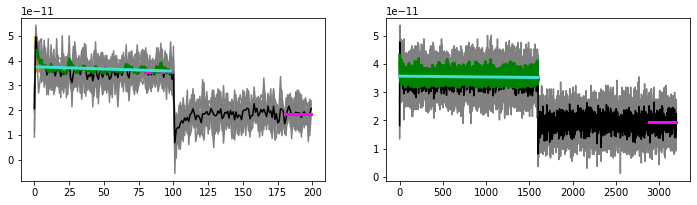

In [8]:
dataset = {'data_name': 'NELL2',
           'data_source': "https://www.dropbox.com/sh/kdyo8a4gy4krpp8/AAD-ra8gZJpdsEKq-jk-Yk_da?dl=0", # CA3 Only
           'file_naming_scheme': ['Rec_date','Virus','GenoType','Sex','Age','Slice_Num','Cell_num','Cell_Type'],
           }

NELL2_results = crispy_mouse_wrap(dataset,VC_prot,IC_prot,
                                  strat_cols=['Rec_date', 'Cell_Type'],
                                  spike_args =  {'spike_thresh':20, 'high_dv_thresh': 50,'low_dv_thresh': -0,'window_ms': 2})

In [10]:
strat_df_dict = NELL2_results['strat_df_dict']

labels = ['Rec_date', 'Virus', 'GenoType', 'Sex', 'Age', 'Slice_Num', 'Cell_num', 'Cell_Type']

possible_cols = list(strat_df_dict[list(strat_df_dict.keys())[0]].columns)
alt_strat_groups = ['Cm_pc_10.0',
                    'Ra_160.0',
                    'Rm_160.0',
                    'Cmq_160.0',
                    'Gain_(Hz/pA)',
                    'Rheobase',
                    'AP_thresh_US',
                    'fast_after_hyperpol',
                    'Spike_latency_(ms)',
                    'Input_Resistance_MO',
                    'Rmp_mV',
                    [c for c in possible_cols if 'Stim_Levels_(pA)' in c],
                    [c for c in possible_cols if 'Spike_Counts' in c],
                    [c for c in possible_cols if 'IV_Early_(V_stim)' in c],
                    [c for c in possible_cols if 'IV_Steady_State_(I_mean)' in c],
                    [c for c in possible_cols if 'IV_Early_(I_peak)' in c],
                    ]


def add_col( new_df,g,k,v):
        new_col_name = g+'_'+k            
        clean_ser = v[g].reset_index().drop(labels='index',axis=1,inplace=False)
        len_diff =  len(clean_ser)-len(new_df)
        if len_diff>0:
            blank_df = pd.DataFrame( index=range(len_diff),columns=new_df.columns)
            new_df = new_df.append(blank_df,ignore_index=True)
        new_df[new_col_name]=clean_ser
        return new_df

# alt_strat_dict = {}
# for group in alt_strat_groups:
#     new_df = pd.DataFrame()
#     sorted_keys = sorted(list(strat_df_dict.keys()))
#     for k in sorted_keys:
#         v = strat_df_dict[k]
#     # for k,v in strat_df_dict.items():
#         if isinstance(group, list):
#             # print(group,'LIST')
#             ''' iter the list'''
#             group_name = group[0]
#             for sub_group in group:
#                 new_df = add_col( new_df,sub_group,k,v)
#         else:
#             group_name = group
#             new_df = add_col( new_df,group,k,v)
#     alt_strat_dict[group_name] = new_df


def restrat(strat_df_dict,alt_strat_groups  ):
    alt_strat_dict = {}
    for group in alt_strat_groups:
        new_df = pd.DataFrame()
        sorted_keys = sorted(list(strat_df_dict.keys()))
        for k in sorted_keys:
            v = strat_df_dict[k]
        # for k,v in strat_df_dict.items():
            if isinstance(group, list):
                # print(group,'LIST')
                ''' iter the list'''
                group_name = group[0]
                for sub_group in group:
                    new_df = add_col( new_df,sub_group,k,v)
            else:
                group_name = group
                new_df = add_col( new_df,group,k,v)
        alt_strat_dict[group_name] = new_df
    return alt_strat_dict    

def write_strat_dfs(strat_dfs, xl_file_name='stratified_data.xlsx'):
    if '.xlsx' not in xl_file_name: xl_file_name = xl_file_name+'.xlsx'
    options = {}
    options['strings_to_formulas'] = False
    options['strings_to_urls'] = False
    writer = pd.ExcelWriter(xl_file_name, options=options)
    for k in strat_dfs.keys():
        cur_df = strat_dfs[k]
        k=k.replace('/','_per_')
        k=k[:31]
        print(str(k))
        cur_df.to_excel(writer, sheet_name=str(k))
    writer.save()
    writer.close()
    files.download(xl_file_name)
    return None



alt_strat_dict = restrat(strat_df_dict,alt_strat_groups  )
write_strat_dfs(alt_strat_dict, dataset['data_name']+'_results_stratified_alternate')

Cm_pc_10.0
Ra_160.0
Rm_160.0
Cmq_160.0
Gain_(Hz_per_pA)
Rheobase
AP_thresh_US
fast_after_hyperpol
Spike_latency_(ms)
Input_Resistance_MO
Rmp_mV
Stim_Levels_(pA)_0.0
Spike_Counts_0.0
IV_Early_(V_stim)_-130.0
IV_Steady_State_(I_mean)_-130.0
IV_Early_(I_peak)_-130.0_pApF


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>